In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, classification_report, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import cross_validate
from IPython.display import display_html
from itertools import chain,cycle
from statistics import mean
from scipy.stats import ttest_ind

In [2]:
df = pd.read_csv('creditcard.csv')
df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [3]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# DATA ANALYSIS

In [4]:
# Phân tích toàn bộ tập dữ liệu, tính năng và phép đo thống kê
df.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# Tổng quan nhanh và tóm tắt về khung dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Class
0    284315
1       492
Name: count, dtype: int64


<Axes: xlabel='Class'>

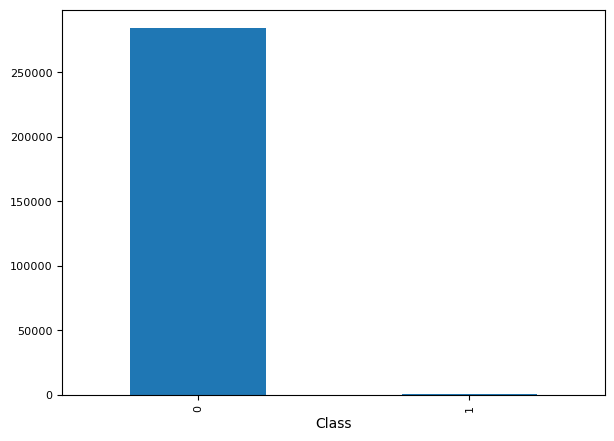

In [7]:
# Biểu đồ số lượng giao dịch theo Class
df_class = df['Class'].value_counts()
print(df_class)
df_class.plot(kind='bar', figsize=(7,5), fontsize=8)

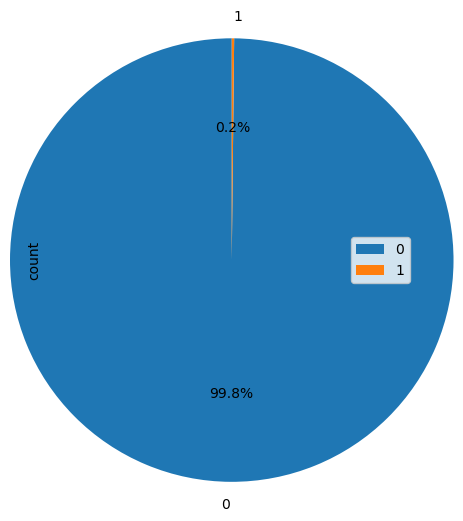

In [8]:
# Vẽ biểu đồ tình trạng mất cân bằng trong biểu đồ hình tròn
plot = df_class.plot(kind = "pie",autopct = '%1.1f%%', radius = 1.5, shadow = False,  legend = True, startangle = 90)
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11292\3785289584.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_time = df_time.groupby(pd.cut(df_time, bins)).count()


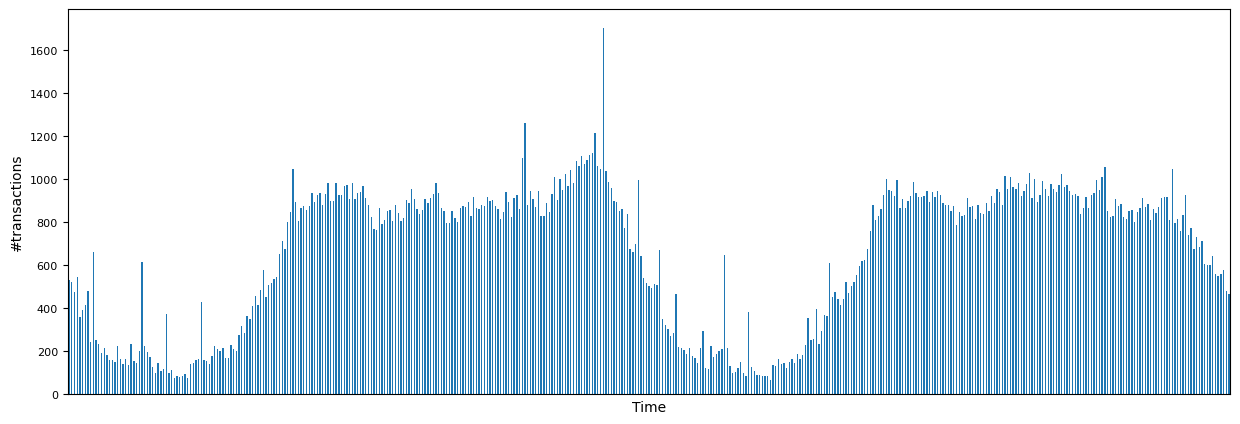

In [9]:
# Vẽ số lượng giao dịch theo phạm vi thời gian

bins = np.arange(start = 0, stop = 172800, step = 400)

df_time = df['Time'].astype(int)
df_time = df_time.groupby(pd.cut(df_time, bins)).count()
plot = df_time.plot(kind='bar', figsize=(15,5), fontsize=8)
plot.set(xlabel="Time", ylabel="#transactions")
plt.xticks([])
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11292\4136902688.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_amount = df_amount.groupby(pd.cut(df_amount, bins)).count()


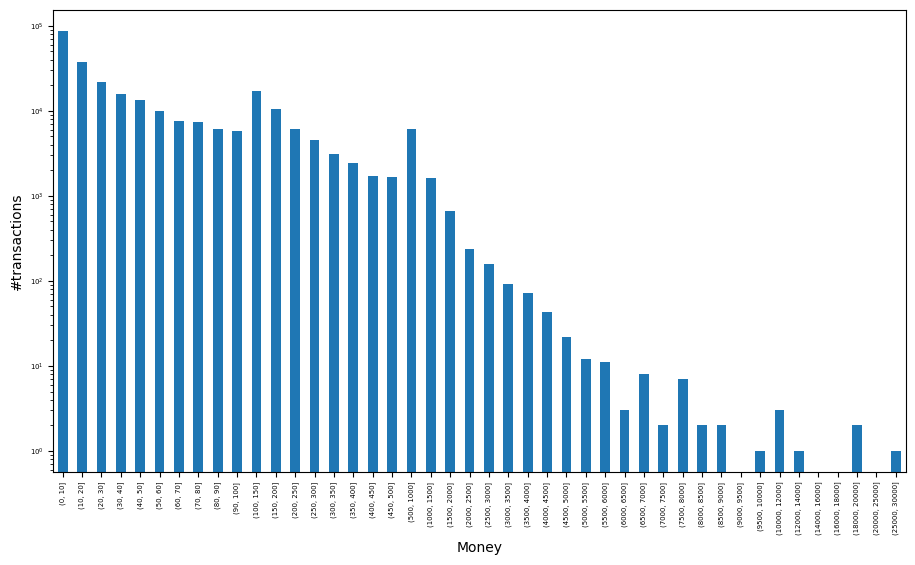

In [10]:
# Vẽ số lượng giao dịch theo phạm vi tiền
bins = [0,10,20,30,40,50,60,70,80,90,100,150,200,250,300,350,400,450,500,1000,1500,2000,2500,3000,3500,4000,4500,
        5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10000,12000,14000,16000,18000,20000,25000,30000]
df_amount = df['Amount'].astype(int)
df_amount = df_amount.groupby(pd.cut(df_amount, bins)).count()
plot = df_amount.plot(kind='bar', figsize=(11,6), logy = True, fontsize=5)
plot.set(xlabel="Money", ylabel="#transactions")
plt.show()

# PREPROCESSING
- Không có giá trị NULL bên trong khung dữ liệu
- Bỏ các hàng trùng lặp
- Chuẩn hóa các tính năng số bằng cách sử dụng chuẩn hóa điểm z
- Tách tập dữ liệu trong train-set và test-set

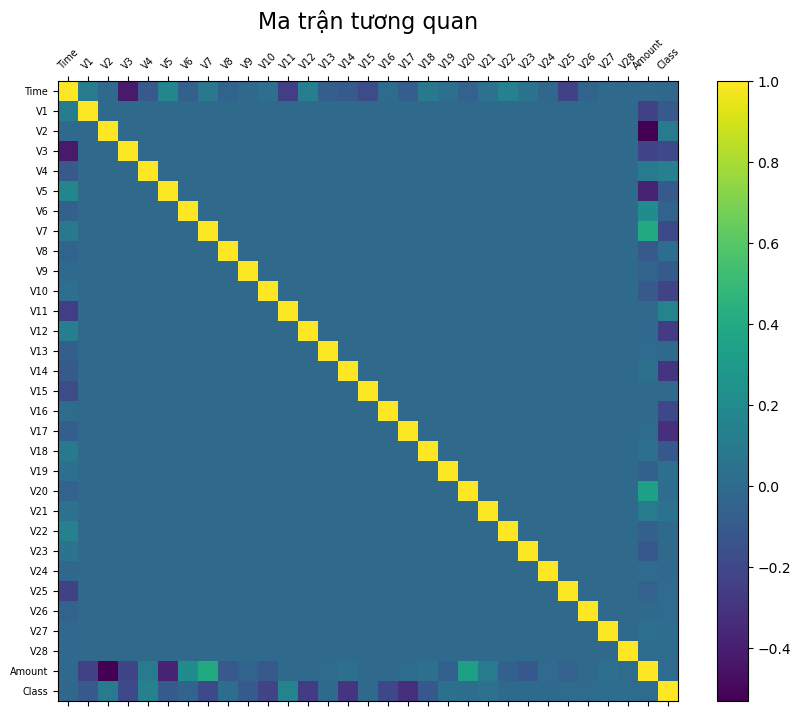

In [11]:
# Kiểm tra tính tương quan
f = plt.figure(figsize=(10, 8))
plt.matshow(df.corr(), fignum = f. number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize = 7, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize = 7)
plt.title('Ma trận tương quan', fontsize = 16);
cb = plt.colorbar()
cb.ax.tick_params(labelsize = 10)
plt.show()

In [12]:
# Bỏ trùng lặp
df.drop_duplicates(inplace = True)
df_class = df['Class'].value_counts()
print(df_class)

Class
0    283253
1       473
Name: count, dtype: int64


In [13]:
# Chuẩn hóa
header_names = df.keys()
col_names = np.array(header_names)

numeric_index = list(set(range(30)))
numeric_col = col_names[numeric_index].tolist()

print(f"numeric_cols = {numeric_col}\n")

minmax_scaler = MinMaxScaler().fit(df[numeric_col])
df[numeric_col] = minmax_scaler.transform(df[numeric_col])

numeric_cols = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']



In [14]:
# Thiết lập k-folds cross validation
df_target = df['Class']
df_data = df.drop('Class', axis = 1)

In [15]:
# Chức năng hỗ trợ cho t-test
def t_test(arr_metric_1, arr_metric_2, conf_value):
    
    stat, p_val = ttest_ind(arr_metric_1, arr_metric_2)
    alpha = conf_value # Đặt giá trị tin cậy

    if p_val <= alpha: # Nếu đúng chúng ta bác bỏ Giả thuyết Null
        print(f"Chúng tôi bác bỏ giả thuyết không ở mức độ tin cậy là {conf_value*100}%")
        auc_mean_1 = mean(arr_metric_1)
        auc_mean_2 = mean(arr_metric_2)
        if(auc_mean_1 > auc_mean_2):
            best = 'First model'
        else:
            best = 'Second_model'

        print("Phân phối khác nhau về mặt thống kê về độ chính xác [p: " + str(p_val) + "]. Bộ phân loại tốt nhất là: "+ best)

    else:
        print("Không thể bác bỏ giả thuyết không")
        print("Sự phân bố không khác biệt về mặt thống kê [ p: " + str(p_val) + " ]")

# 1) CLASSIFICATION - IMBALANCED DATASET

In [16]:
# Phân tầng KFold():
# shuffle = True --> nó trộn các mẫu của các lớp khác nhau trước khi tạo các nếp gấp
# Random_state = 123 --> nó ảnh hưởng đến tính ngẫu nhiên của chỉ mục trước khi tạo nếp gấp
# Nó duy trì sự phân bố giống nhau nhất có thể của các lớp trong mỗi nếp gấp.

skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 123)

## LOGISTIC REGRESSION
Tôi sử dụng LogisticRegression() với các tham số sau:
- max_iter = 1000 ----> Số lần lặp tối đa mà bộ giải thực hiện để hội tụ (default solver = "lbfgs")

Ưu điểm:
1) Được đào tạo rất hiệu quả với thời gian phù hợp giảm so với các thuật toán ML khác
2) Có thể giải thích được nên dễ hiểu cách đưa ra quyết định

Nhược điểm:
1) Nó yêu cầu cỡ mẫu lớn hơn các thuật toán ML khác
2) Nó giả định tính tuyến tính của các tính năng

FOLD 1
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.88      0.52      0.65        95

    accuracy                           1.00     56746
   macro avg       0.94      0.76      0.82     56746
weighted avg       1.00      1.00      1.00     56746

--------------CONFUSION MATRIX--------------



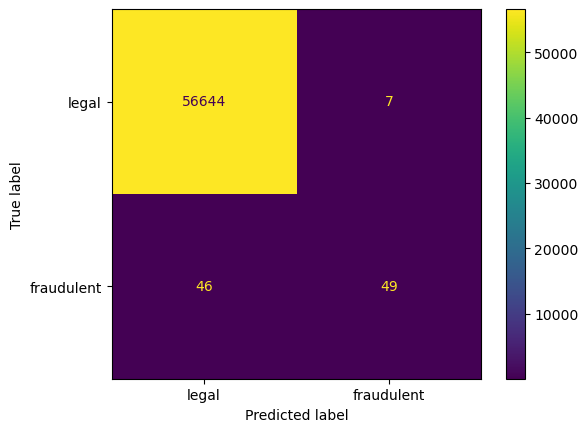

,0,1,macro avg,weighted avg
precision,0.999189,0.875000,0.937094,0.998981
recall,0.999876,0.515789,0.757833,0.999066
f1-score,0.999532,0.649007,0.824270,0.998946
support,56651.000000,95.000000,56746.000000,56746.000000


FOLD 2
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.72      0.38      0.50        94

    accuracy                           1.00     56745
   macro avg       0.86      0.69      0.75     56745
weighted avg       1.00      1.00      1.00     56745

--------------CONFUSION MATRIX--------------



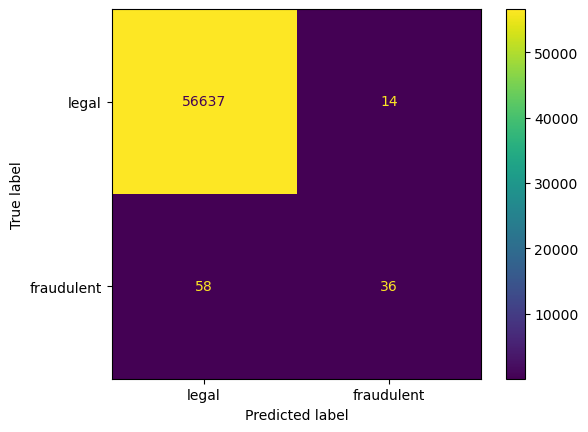

,0,1,macro avg,weighted avg
precision,0.998977,0.720000,0.859488,0.998515
recall,0.999753,0.382979,0.691366,0.998731
f1-score,0.999365,0.500000,0.749682,0.998538
support,56651.000000,94.000000,56745.000000,56745.000000


FOLD 3
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.92      0.59      0.71        94

    accuracy                           1.00     56745
   macro avg       0.96      0.79      0.86     56745
weighted avg       1.00      1.00      1.00     56745

--------------CONFUSION MATRIX--------------



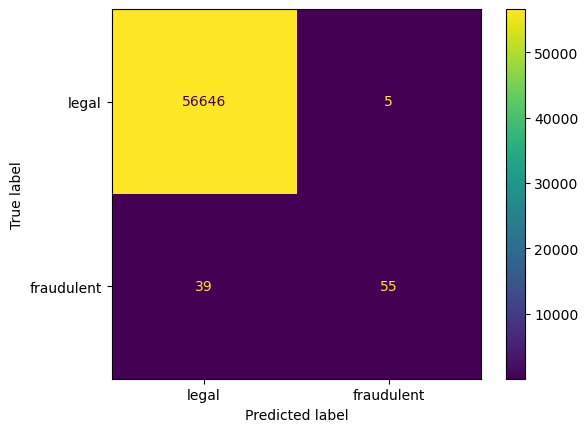

,0,1,macro avg,weighted avg
precision,0.999312,0.916667,0.957989,0.999175
recall,0.999912,0.585106,0.792509,0.999225
f1-score,0.999612,0.714286,0.856949,0.999139
support,56651.000000,94.000000,56745.000000,56745.000000


FOLD 4
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.88      0.53      0.66        95

    accuracy                           1.00     56745
   macro avg       0.94      0.76      0.83     56745
weighted avg       1.00      1.00      1.00     56745

--------------CONFUSION MATRIX--------------



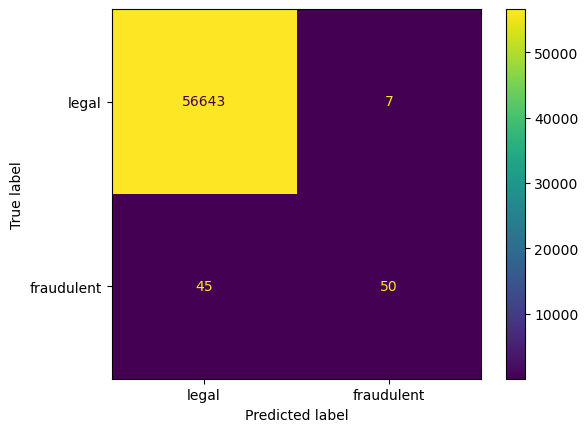

,0,1,macro avg,weighted avg
precision,0.999206,0.877193,0.938200,0.999002
recall,0.999876,0.526316,0.763096,0.999084
f1-score,0.999541,0.657895,0.828718,0.998969
support,56650.000000,95.000000,56745.000000,56745.000000


FOLD 5
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.89      0.59      0.71        95

    accuracy                           1.00     56745
   macro avg       0.94      0.79      0.85     56745
weighted avg       1.00      1.00      1.00     56745

--------------CONFUSION MATRIX--------------



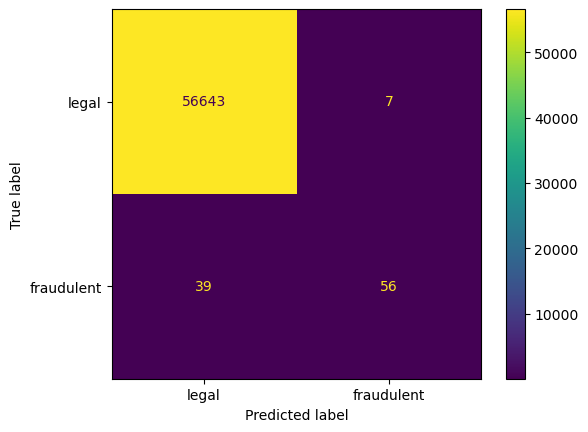

,0,1,macro avg,weighted avg
precision,0.999312,0.888889,0.944100,0.999127
recall,0.999876,0.589474,0.794675,0.999189
f1-score,0.999594,0.708861,0.854227,0.999107
support,56650.000000,95.000000,56745.000000,56745.000000


In [17]:
model = LogisticRegression(max_iter = 1000, random_state = 0)

list_df_metrics = []
fit_time = []
auc_lr = []
acc_lr = []

k = 1
for train_index, test_index in skf.split(np.zeros(len(df_target)), df_target):
    print(f'FOLD {k}')
    
    # fit and predict sử dụng classifier
    X_tr = df_data.iloc[train_index]
    y_tr = df_target.iloc[train_index]
    X_te = df_data.iloc[test_index]
    y_te = df_target.iloc[test_index]
    
    
    start = time.time()
    model.fit(X_tr,y_tr)
    end = time.time()
    
    fit_time.append(str(round(end-start, 2)))
    
    y_pred = model.predict(X_te)
    
    auc_lr.append(roc_auc_score(y_pred, y_te))
    
    
    print("--------------CLASSIFICATION REPORT--------------\n")
    cr = classification_report(y_te, y_pred, output_dict = True)
    print(classification_report(y_te, y_pred))
    
    acc_lr.append(cr['accuracy'])
    
    print("--------------CONFUSION MATRIX--------------\n")
    ConfusionMatrixDisplay.from_predictions(y_te, y_pred, display_labels = ['legal','fraudulent'])
    plt.show()
    
    # lưu trữ số liệu của mỗi lớp dưới dạng khung dữ liệu
    df_metrics = pd.DataFrame({k:v for k,v in cr.items() if k != 'accuracy'})
    display(df_metrics)
    list_df_metrics.append(df_metrics)
    k += 1
    

# tính toán số liệu trung bình mỗi lớp    
df_concat = pd.concat(list_df_metrics)
grouped_by_row_index = df_concat.groupby(df_concat.index)
df_lr_avg_imb = grouped_by_row_index.mean()

# Tính toán độ chính xác trung bình
acc_lr_avg = np.mean(acc_lr)

# Tính toán average AUC và fit-time
auc_lr_avg = np.mean(auc_lr)
fit_time = [float(i) for i in fit_time]
fit_time_lr_avg = np.mean(fit_time)

## MẠNG THẦN KINH - NEURAL NETWORK
#### 1) Thử nghiệm tìm cấu hình tốt nhất của mạng nơ-ron từ 6 mạng khác nhau
#### 2) Sử dụng mô hình tốt nhất để phân loại giao dịch

Tôi sử dụng MLPClassifier với các tham số sausolver = 'adam'adam' ---> Loại bộ giải dựa trên trình tối ưu hóa dựa trên độ dốc ngẫu nhiên
- max_iter = 200 ----> Với bộ giải này, nó cho biết số kỷ nguyên tối đa
- Random_state = 0 ---> Hạt giống cho việc tạo số ngẫu nhiên các giá trị ban đầu về trọng số và độ lệch

ƯU ĐIỂM:
1) Tìm hiểu ranh giới lớp phức tạp hơn
2) Xử lý tốt số lượng lớn các tính năng

Nhược điểOverfittingang bị quá mức có thể được kiểm soát bằng cách giảm số lượng kỷ nguyên, không chuyên môn hóa quá nhiều mô hình.
2) Khó triển khai mạng do lựa chọn các lớp ẩn tham số và số lượng nơ-ron.

### CROSS VALIDATION TRÊN SÁU MẠNG NEURAL

In [18]:
# Các thử nghiệm thực nghiệm với 6 cấu hình khác nhau của mạng lưới thần kinh
neural_net1 = MLPClassifier(solver = 'adam', max_iter = 200, hidden_layer_sizes = (5), random_state = 0)
neural_net2 = MLPClassifier(solver = 'adam', max_iter = 200, hidden_layer_sizes = (10), random_state = 0)
neural_net3 = MLPClassifier(solver = 'adam', max_iter = 200, hidden_layer_sizes = (5,5), random_state = 0)
neural_net4 = MLPClassifier(solver = 'adam', max_iter = 200, hidden_layer_sizes = (5,10), random_state = 0)
neural_net5 = MLPClassifier(solver = 'adam', max_iter = 200, hidden_layer_sizes = (10,5), random_state = 0)
neural_net6 = MLPClassifier(solver = 'adam', max_iter = 200, hidden_layer_sizes = (10,10), random_state = 0)

# Thiết lập để thu thập fit_time và số liệu của tất cả các mô hình
models = [neural_net1, neural_net2, neural_net3, neural_net4, neural_net5, neural_net6]
column_names = ['neural_net1', 'neural_net2', 'neural_net3', 'neural_net4', 'neural_net5', 'neural_net6']

df_fit_time = pd.DataFrame(columns = column_names)
df_metrics = pd.DataFrame(columns = column_names)
df_auc = pd.DataFrame(columns = column_names)
df_acc = pd.DataFrame(columns = column_names)


# Fit and Predict step
k = 1
for train_index, test_index in skf.split(np.zeros(len(df_target)), df_target):
    print(f'FOLD {k}')
    
    X_tr = df_data.iloc[train_index]
    y_tr = df_target.iloc[train_index]
    X_te = df_data.iloc[test_index]
    y_te = df_target.iloc[test_index]
    
    list_df_metrics = []
    tmp_time = []
    tmp_auc = []
    tmp_acc = []
    
    for i in models:
        start = time.time()
        i.fit(X_tr,y_tr)
        end = time.time()
        
        tmp_time.append(str(round(end-start, 2)))
    
        y_pred = i.predict(X_te)
        
        tmp_auc.append(roc_auc_score(y_pred, y_te))
    
        cr = classification_report(y_te, y_pred, output_dict = True)
        list_df_metrics.append(pd.DataFrame({k:v for k,v in cr.items() if k != 'accuracy'}))
        
        tmp_acc.append(cr['accuracy'])
        
        if(len(tmp_time) == 5):
            print(tmp_time)
            
    df_metrics.loc[len(df_metrics.index)] = list_df_metrics
    df_fit_time.loc[len(df_fit_time.index)] = tmp_time
    df_auc.loc[len(df_auc.index)] = tmp_auc
    df_acc.loc[len(df_acc.index)] = tmp_acc
    
    k += 1

FOLD 1
['6.86', '7.74', '17.17', '9.34', '11.12']
FOLD 2
['6.73', '7.44', '14.21', '12.56', '10.37']
FOLD 3
['8.72', '6.96', '21.8', '9.08', '13.64']
FOLD 4
['5.66', '7.01', '12.04', '14.35', '8.56']
FOLD 5
['8.08', '7.22', '14.17', '8.49', '10.56']


In [19]:
# Tính hiệu suất trung bình
nn_fit_time_avg = []
auc_nn_avg = []
acc_nn_avg = []

precis_arr = []
sensit_arr = []
f1score_arr = []

# Tạo mảng số liệu trung bình
for (columnName, columnData) in df_metrics.items(): 
    df_concat = pd.concat(columnData.values)
    grouped_by_row_index = df_concat.groupby(df_concat.index)
    metric_avg = grouped_by_row_index.mean()
    
    precis_arr.append(metric_avg.iloc[1, 2])
    sensit_arr.append(metric_avg.iloc[2, 2])
    f1score_arr.append(metric_avg.iloc[0, 2])

# Tạo mảng thời gian phù hợp trung bình
for (columnName, columnData) in df_fit_time.items():
    nn_fit_time_avg.append(columnData.values.astype(float).mean())

# Tạo mảng AUC trung bình
for (columnName, columnData) in df_auc.items():
    auc_nn_avg.append(columnData.values.astype(float).mean())
    
# Tạo mảng có độ chính xác trung bình
for (columnName, columnData) in df_acc.items():
    acc_nn_avg.append(columnData.values.astype(float).mean())


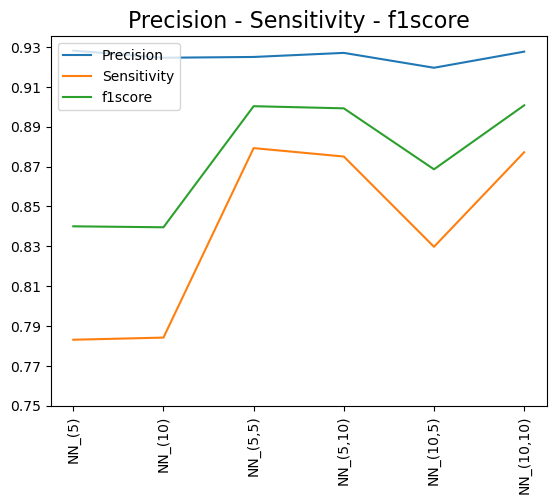

In [20]:
# Vẽ kết quả các cấu hình khác nhau cho mạng nơ-ron

plt.plot(column_names, precis_arr, column_names, sensit_arr, column_names, f1score_arr)
plt.xticks(np.arange(6), ['NN_(5)', 'NN_(10)', 'NN_(5,5)', 'NN_(5,10)', 'NN_(10,5)', 'NN_(10,10)'], rotation = 'vertical')
plt.yticks(np.arange(0.75, 0.94, 0.02))
plt.title('Precision - Sensitivity - f1score', fontsize = 16);
plt.legend(['Precision','Sensitivity','f1score'], loc="upper left")
plt.show()

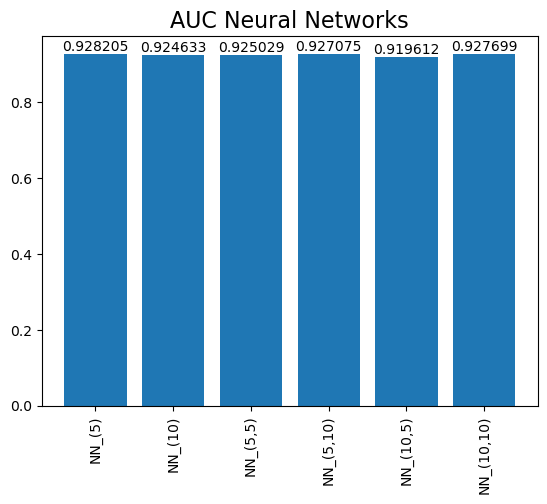

In [21]:
# Vẽ AUC của cấu hình khác nhau cho mạng thần kinh
fig, ax = plt.subplots()
plot = ax.bar(column_names, auc_nn_avg)
ax.bar_label(plot)
plt.xticks(np.arange(6), ['NN_(5)', 'NN_(10)', 'NN_(5,5)', 'NN_(5,10)', 'NN_(10,5)', 'NN_(10,10)'], rotation = 'vertical')
plt.title('AUC Neural Networks', fontsize = 16);
plt.show()

In [22]:
# Các tên mô hình
model_names = ['neural_net1', 'neural_net2', 'neural_net3', 'neural_net4', 'neural_net5', 'neural_net6']

# So sánh AUC trung bình
best_model_index_auc = np.argmax(auc_nn_avg)
best_model_name_auc = model_names[best_model_index_auc]

# So sánh độ chính xác trung bình
best_model_index_acc = np.argmax(acc_nn_avg)
best_model_name_acc = model_names[best_model_index_acc]

# In ra tên của các mô hình tốt nhất dựa trên AUC và độ chính xác
print(f"Best model based on AUC: {best_model_name_auc}")
print(f"Best model based on Accuracy: {best_model_name_acc}")

# So sánh F1-Score trung bình
best_model_index_f1 = np.argmax(f1score_arr)
best_model_name_f1 = model_names[best_model_index_f1]

print(f"Best model based on F1-Score: {best_model_name_f1}")

# So sánh Precision trung bình
best_model_index_precis = np.argmax(precis_arr)
best_model_name_precis = model_names[best_model_index_precis]

print(f"Best model based on Precision: {best_model_name_precis}")

# So sánh Sensitivity trung bình
best_model_index_sensit = np.argmax(sensit_arr)
best_model_name_sensit = model_names[best_model_index_sensit]

print(f"Best model based on Sensitivity: {best_model_name_sensit}")


Best model based on AUC: neural_net1
Best model based on Accuracy: neural_net6
Best model based on F1-Score: neural_net6
Best model based on Precision: neural_net1
Best model based on Sensitivity: neural_net3


In [23]:
# Chuẩn bị vectơ AUC của mạng tốt nhất cho t-test
best_nn_auc = []

for obj in df_auc['neural_net6'].items():
    print(obj)
    best_nn_auc.append(obj[1])

(0, 0.9174352729390588)
(1, 0.904798582142664)
(2, 0.9292264487863625)
(3, 0.9366139364925183)
(4, 0.9504231571681805)


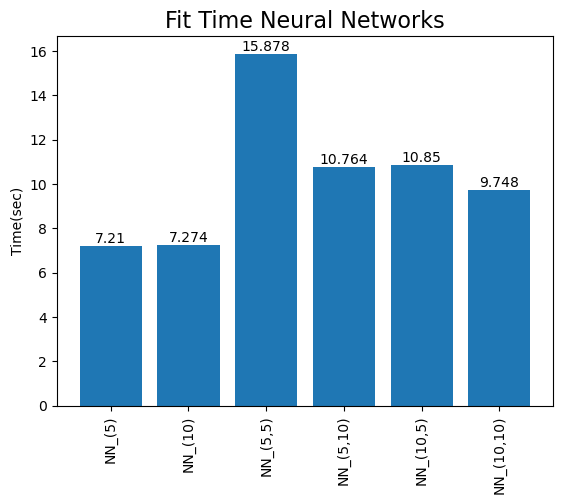

In [24]:
# Vẽ đồ thị fit-time của cấu hình khác nhau cho mạng nơ-ron
fig, ax = plt.subplots()
plot = plt.bar(column_names, nn_fit_time_avg)
ax.bar_label(plot)
plt.xticks(np.arange(6), ['NN_(5)', 'NN_(10)', 'NN_(5,5)', 'NN_(5,10)', 'NN_(10,5)', 'NN_(10,10)'], rotation = 'vertical')
plt.title('Fit Time Neural Networks', fontsize = 16);
plt.ylabel("Time(sec)")
plt.show()

## RANDOM FOREST
Tôi sử dụng RandomForestClassifier() với các tham số sau:
- max_deep = 20 ---> Độ sâu tối đa của cây
- Random_state = 0 ---> Kiểm soát cả tính ngẫu nhiên của quá trình khởi động của các mẫu được sử dụng khi xây dựng cây và việc lấy mẫu các đặc điểm cần xem xét khi tìm kiếm sự phân chia tốt nhất

ƯU ĐIỂM:
1) Một trong những thuật toán học chính xác nhất
2) RF chạy hiệu quả trên cơ sở dữ liệu lớn

Nhược điểm:
1) RFs đã được quan sát thấy là quá phù hợp đối với một số tập dữ liệu có nhiệm vụ phân loại/hồi quy nhiễu

FOLD 1
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.93      0.79      0.85        95

    accuracy                           1.00     56746
   macro avg       0.96      0.89      0.93     56746
weighted avg       1.00      1.00      1.00     56746

--------------CONFUSION MATRIX--------------



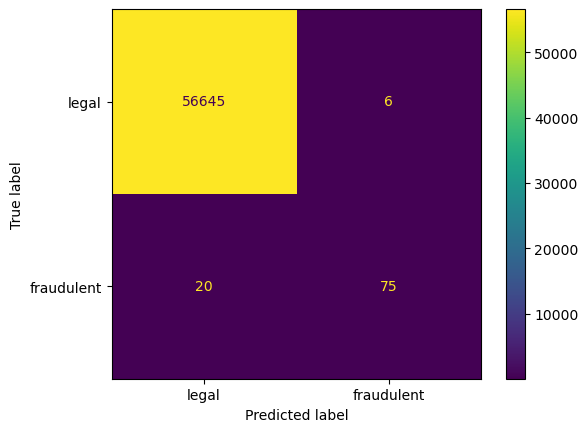

,0,1,macro avg,weighted avg
precision,0.999647,0.925926,0.962786,0.999524
recall,0.999894,0.789474,0.894684,0.999542
f1-score,0.999771,0.852273,0.926022,0.999524
support,56651.000000,95.000000,56746.000000,56746.000000


FOLD 2
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.94      0.68      0.79        94

    accuracy                           1.00     56745
   macro avg       0.97      0.84      0.89     56745
weighted avg       1.00      1.00      1.00     56745

--------------CONFUSION MATRIX--------------



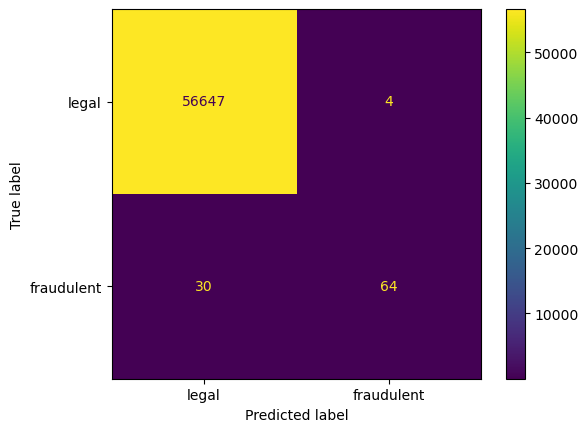

,0,1,macro avg,weighted avg
precision,0.999471,0.941176,0.970324,0.999374
recall,0.999929,0.680851,0.840390,0.999401
f1-score,0.999700,0.790123,0.894912,0.999353
support,56651.000000,94.000000,56745.000000,56745.000000


FOLD 3
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.92      0.81      0.86        94

    accuracy                           1.00     56745
   macro avg       0.96      0.90      0.93     56745
weighted avg       1.00      1.00      1.00     56745

--------------CONFUSION MATRIX--------------



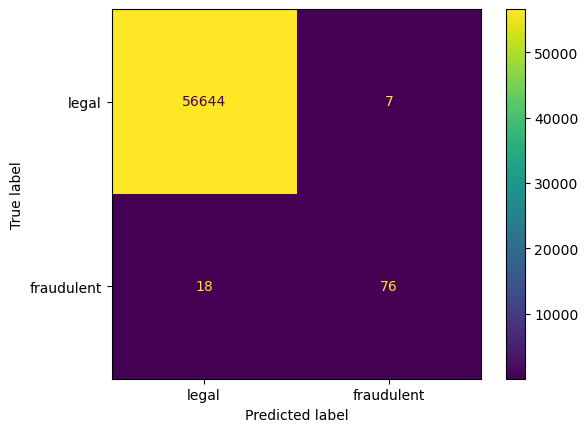

,0,1,macro avg,weighted avg
precision,0.999682,0.915663,0.957672,0.999543
recall,0.999876,0.808511,0.904194,0.999559
f1-score,0.999779,0.858757,0.929268,0.999546
support,56651.000000,94.000000,56745.000000,56745.000000


FOLD 4
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.95      0.82      0.88        95

    accuracy                           1.00     56745
   macro avg       0.98      0.91      0.94     56745
weighted avg       1.00      1.00      1.00     56745

--------------CONFUSION MATRIX--------------



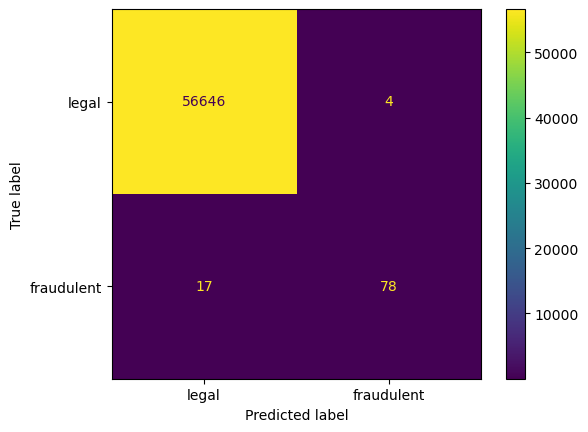

,0,1,macro avg,weighted avg
precision,0.999700,0.951220,0.975460,0.999619
recall,0.999929,0.821053,0.910491,0.999630
f1-score,0.999815,0.881356,0.940585,0.999616
support,56650.000000,95.000000,56745.000000,56745.000000


FOLD 5
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.96      0.75      0.84        95

    accuracy                           1.00     56745
   macro avg       0.98      0.87      0.92     56745
weighted avg       1.00      1.00      1.00     56745

--------------CONFUSION MATRIX--------------



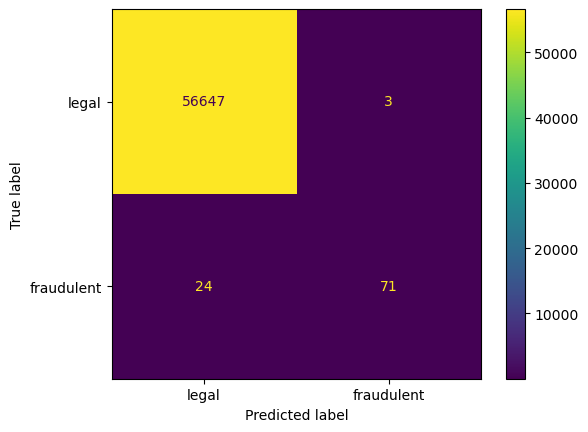

,0,1,macro avg,weighted avg
precision,0.999577,0.959459,0.979518,0.999509
recall,0.999947,0.747368,0.873658,0.999524
f1-score,0.999762,0.840237,0.919999,0.999495
support,56650.000000,95.000000,56745.000000,56745.000000


In [25]:
random_for = RandomForestClassifier(max_depth = 20, random_state = 0)

list_df_metrics = []
fit_time = []
auc_rf = []
acc_rf = []

k = 1
for train_index, test_index in skf.split(np.zeros(len(df_target)), df_target):
    print(f'FOLD {k}')
    
    #Fit and predict sử dụng classifier
    X_tr = df_data.iloc[train_index]
    y_tr = df_target.iloc[train_index]
    X_te = df_data.iloc[test_index]
    y_te = df_target.iloc[test_index]
    
    
    start = time.time()
    random_for.fit(X_tr,y_tr)
    end = time.time()
    
    fit_time.append(str(round(end-start, 2)))
    
    y_pred = random_for.predict(X_te)
    
    auc_rf.append(roc_auc_score(y_pred, y_te))
    
    print("--------------CLASSIFICATION REPORT--------------\n")
    cr = classification_report(y_te, y_pred, output_dict = True)
    print(classification_report(y_te, y_pred))
    
    acc_rf.append(cr['accuracy'])
    
    print("--------------CONFUSION MATRIX--------------\n")
    ConfusionMatrixDisplay.from_predictions(y_te, y_pred, display_labels = ['legal','fraudulent'])
    plt.show()
    
    # Lưu trữ số liệu của mỗi lớp dưới dạng khung dữ liệu
    df_metrics = pd.DataFrame({k:v for k,v in cr.items() if k != 'accuracy'})
    display(df_metrics)
    list_df_metrics.append(df_metrics)
    k += 1
    

# Tính chỉ số trung bình mỗi lớp
df_concat = pd.concat(list_df_metrics)
grouped_by_row_index = df_concat.groupby(df_concat.index)
df_rf_avg_imb = grouped_by_row_index.mean()

# Tính toán độ chính xác trung bình
acc_rf_avg = np.mean(acc_rf)

# Tính toán AUC trung bình và fit-time
auc_rf_avg = np.mean(auc_rf)            
fit_time = [float(i) for i in fit_time]
fit_time_rf_avg = np.mean(fit_time)

## PERFORMANCE EVALUATION

In [26]:
# Hỗ trợ chức năng hiển thị
def display_side_by_side(*args, titles = cycle([''])):
    html_str = ''
    for df, title in zip(args, chain(titles, cycle(['</br>'])) ):
        html_str += '<th style="text-align:center"><td style="vertical-align:top">'
        html_str += f'<h2 style="text-align: center;">{title}</h2>'
        html_str += df.to_html().replace('table','table style="display:inline"')
        html_str += '</td></th>'
    display_html(html_str, raw = True)

In [27]:
def print_auc_acc_metrics(auc_lr, auc_nn, auc_rf, acc_lr, acc_nn, acc_rf):
    print("\n\n---------------AUC EVALUATION----------------\n")
    print(f"AUC LOGISTIC-REGRESSION: {auc_lr}\n")
    print(f"AUC NEURAL NETWORK: {auc_nn}\n")
    print(f"AUC RANDOM FOREST: {auc_rf}\n")

    print("\n\n---------------ACCURACY EVALUATION----------------\n")
    print(f"ACCURACY LOGISTIC-REGRESSION: {acc_lr}\n")
    print(f"ACCURACY NEURAL NETWORK: {acc_nn}\n")
    print(f"ACCURACY RANDOM FOREST: {acc_rf}\n")

In [28]:
display_side_by_side(df_lr_avg_imb,df_rf_avg_imb, titles = ['Logistic Regression', 'Random Forest'])

print(f"neural_net(10,10):\nf1-score = {f1score_arr[5]}\nprecision = {precis_arr[5]}\nsensitivity = {sensit_arr[5]}")

print_auc_acc_metrics(auc_lr_avg, auc_nn_avg[5], auc_rf_avg, acc_lr_avg, acc_nn_avg[5], acc_rf_avg)

,0,1,macro avg,weighted avg
f1-score,0.999529,0.646010,0.822769,0.998940
precision,0.999199,0.855550,0.927374,0.998960
recall,0.999859,0.519933,0.759896,0.999059
support,56650.600000,94.600000,56745.200000,56745.200000
,0,1,macro avg,weighted avg
f1-score,0.999765,0.844549,0.922157,0.999507
precision,0.999615,0.938689,0.969152,0.999514
recall,0.999915,0.769451,0.884683,0.999531
support,56650.600000,94.600000,56745.200000,56745.200000


neural_net(10,10):
f1-score = 0.9007572806492956
precision = 0.9276994795057568
sensitivity = 0.8772177159930585


---------------AUC EVALUATION----------------

AUC LOGISTIC-REGRESSION: 0.9273744208905954

AUC NEURAL NETWORK: 0.9276994795057568

AUC RANDOM FOREST: 0.9691520562311373



---------------ACCURACY EVALUATION----------------

ACCURACY LOGISTIC-REGRESSION: 0.9990589512167999

ACCURACY NEURAL NETWORK: 0.9993796833893761

ACCURACY RANDOM FOREST: 0.999531237847148



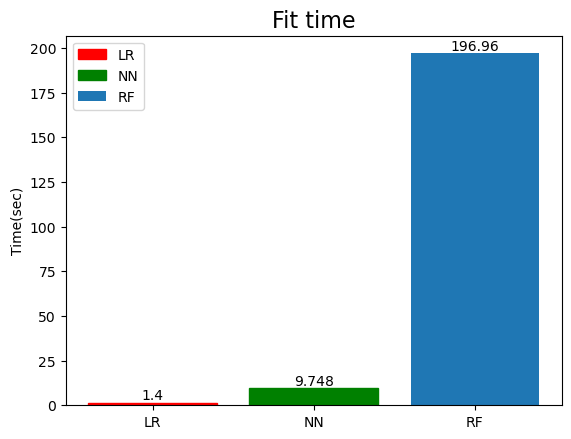

In [29]:
# Vẽ biểu đồ fit-time của ba mô hình được chọn
fig, ax = plt.subplots()
plot = plt.bar([1,2,3], [fit_time_lr_avg, nn_fit_time_avg[5], fit_time_rf_avg], label = ['LR', 'NN', 'RF'])
ax.bar_label(plot)
plot[0].set_color('r')
plot[1].set_color('g')
plt.legend(loc = 'best')
plt.xticks([1,2,3],['LR', 'NN', 'RF'])
plt.title('Fit time', fontsize = 16);
plt.ylabel('Time(sec)')
plt.show()

## T-TEST ON 2 BEST CLASSIFIERS (AUC)

In [30]:
# Neural Network và Random Forest
t_test(best_nn_auc, auc_rf, 0.05)

Chúng tôi bác bỏ giả thuyết không ở mức độ tin cậy là 5.0%
Phân phối khác nhau về mặt thống kê về độ chính xác [p: 0.0015208999350977527]. Bộ phân loại tốt nhất là: Second_model


# 2) CLASSIFICATION - TẬP DỮ LIỆU ĐƯỢC CÂN BẰNG LẠI

## BƯỚC TÁI CÂN BẰNG SƠ BỘ

RandomUnderSampler(), RandomOverSampler():
- Chức năng lấy mẫu dưới lớp đa số và lấy mẫu quá mức lớp thiểu số bằng cách chọn mẫu ngẫu nhiên và thay thế.
- samples_strategy ---> nó đặt lớp thànundersampleới hoặoversampleuá

In [31]:
under_sampler = RandomUnderSampler(sampling_strategy = 'majority')
over_sampler = RandomOverSampler(sampling_strategy = 'minority')

## LOGISTIC REGRESSION - OVERSAMPLING

FOLD 1
Class
0    226602
1    226602
Name: count, dtype: int64
Class
0    56651
1       95
Name: count, dtype: int64
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.07      0.89      0.13        95

    accuracy                           0.98     56746
   macro avg       0.54      0.94      0.56     56746
weighted avg       1.00      0.98      0.99     56746

--------------CONFUSION MATRIX--------------



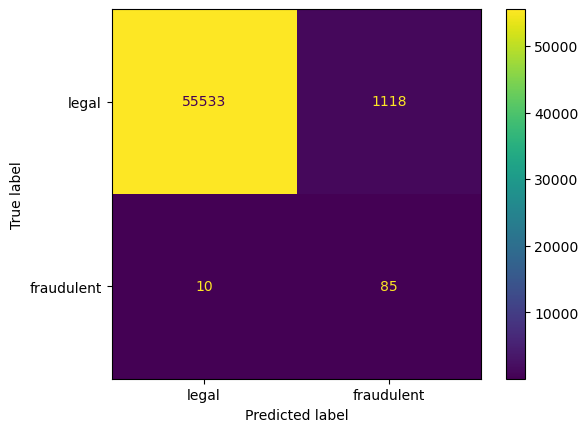

,0,1,macro avg,weighted avg
precision,0.999820,0.070657,0.535238,0.998264
recall,0.980265,0.894737,0.937501,0.980122
f1-score,0.989946,0.130971,0.560458,0.988508
support,56651.000000,95.000000,56746.000000,56746.000000


FOLD 2
Class
0    226602
1    226602
Name: count, dtype: int64
Class
0    56651
1       94
Name: count, dtype: int64
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.07      0.85      0.13        94

    accuracy                           0.98     56745
   macro avg       0.53      0.92      0.56     56745
weighted avg       1.00      0.98      0.99     56745

--------------CONFUSION MATRIX--------------



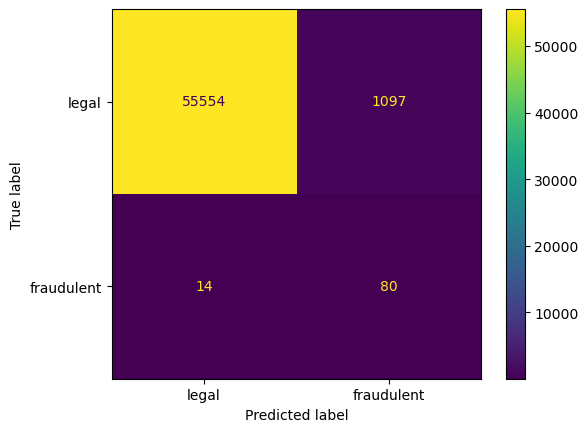

,0,1,macro avg,weighted avg
precision,0.999748,0.067969,0.533859,0.998205
recall,0.980636,0.851064,0.915850,0.980421
f1-score,0.990100,0.125885,0.557992,0.988668
support,56651.000000,94.000000,56745.000000,56745.000000


FOLD 3
Class
0    226602
1    226602
Name: count, dtype: int64
Class
0    56651
1       94
Name: count, dtype: int64
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.06      0.94      0.11        94

    accuracy                           0.98     56745
   macro avg       0.53      0.96      0.55     56745
weighted avg       1.00      0.98      0.99     56745

--------------CONFUSION MATRIX--------------



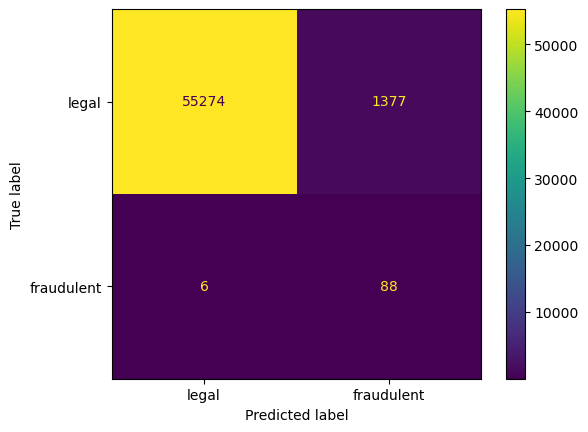

,0,1,macro avg,weighted avg
precision,0.999891,0.060068,0.529980,0.998335
recall,0.975693,0.936170,0.955932,0.975628
f1-score,0.987644,0.112893,0.550269,0.986195
support,56651.000000,94.000000,56745.000000,56745.000000


FOLD 4
Class
0    226603
1    226603
Name: count, dtype: int64
Class
0    56650
1       95
Name: count, dtype: int64
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56650
           1       0.06      0.91      0.11        95

    accuracy                           0.98     56745
   macro avg       0.53      0.94      0.55     56745
weighted avg       1.00      0.98      0.99     56745

--------------CONFUSION MATRIX--------------



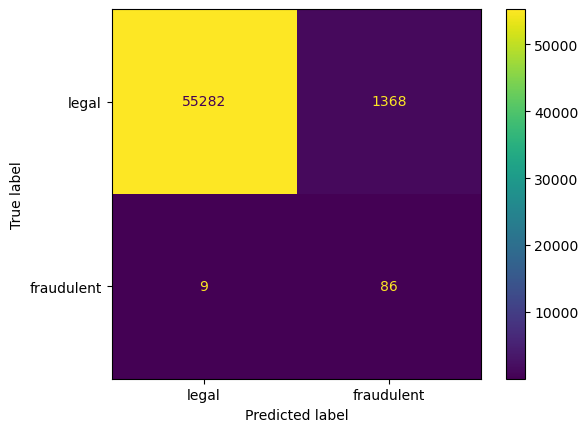

,0,1,macro avg,weighted avg
precision,0.999837,0.059147,0.529492,0.998262
recall,0.975852,0.905263,0.940557,0.975734
f1-score,0.987699,0.111039,0.549369,0.986231
support,56650.000000,95.000000,56745.000000,56745.000000


FOLD 5
Class
0    226603
1    226603
Name: count, dtype: int64
Class
0    56650
1       95
Name: count, dtype: int64
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56650
           1       0.07      0.95      0.13        95

    accuracy                           0.98     56745
   macro avg       0.54      0.96      0.56     56745
weighted avg       1.00      0.98      0.99     56745

--------------CONFUSION MATRIX--------------



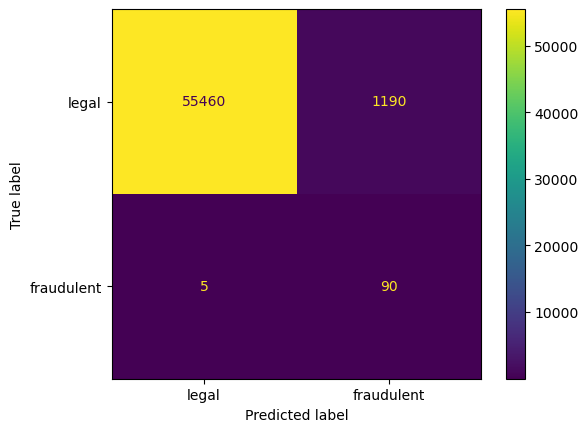

,0,1,macro avg,weighted avg
precision,0.999910,0.070312,0.535111,0.998354
recall,0.978994,0.947368,0.963181,0.978941
f1-score,0.989341,0.130909,0.560125,0.987904
support,56650.000000,95.000000,56745.000000,56745.000000


In [32]:
model = LogisticRegression(max_iter = 1000, random_state = 0)

list_df_metrics = []
fit_time = []
auc_lr = []
acc_lr = []

k = 1
for train_index, test_index in skf.split(np.zeros(len(df_target)), df_target):
    print(f'FOLD {k}')
    
    X_tr = df_data.iloc[train_index]
    y_tr = df_target.iloc[train_index]
    X_te = df_data.iloc[test_index]
    y_te = df_target.iloc[test_index]
    
    X_tr_over, y_tr_over = over_sampler.fit_resample(X_tr, y_tr)
    
    print(y_tr_over.value_counts())
    print(y_te.value_counts())
    
    start = time.time()
    model.fit(X_tr_over,y_tr_over)
    end = time.time()
    
    fit_time.append(str(round(end-start, 2)))
    
    y_pred = model.predict(X_te)
    
    auc_lr.append(roc_auc_score(y_pred, y_te))
    
    print("--------------CLASSIFICATION REPORT--------------\n")
    cr = classification_report(y_te, y_pred, output_dict = True)
    print(classification_report(y_te, y_pred))
    
    print("--------------CONFUSION MATRIX--------------\n")
    ConfusionMatrixDisplay.from_predictions(y_te, y_pred, display_labels = ['legal','fraudulent'])
    plt.show()
    
    #Store accuracy
    acc_lr.append(cr['accuracy'])
    
    #Store per-class metrics as a dataframe
    df_metrics = pd.DataFrame({k:v for k,v in cr.items() if k != 'accuracy'})
    display(df_metrics)
    list_df_metrics.append(df_metrics)
    k += 1
    

# Tính chỉ số trung bình mỗi lớp  
df_concat = pd.concat(list_df_metrics)
grouped_by_row_index = df_concat.groupby(df_concat.index)
df_lr_avg = grouped_by_row_index.mean()

# Tính toán độ chính xác trung bình
acc_lr_avg = np.mean(acc_lr)


# Tính toán trung bình AUC và fit time
auc_lr_avg = np.mean(auc_lr)

fit_time = [float(i) for i in fit_time]
fit_time_lr_avg = np.mean(fit_time)

## NEURAL NETWORK - OVERSAMPLING

FOLD 1
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56651
           1       0.03      0.89      0.05        95

    accuracy                           0.95     56746
   macro avg       0.51      0.92      0.51     56746
weighted avg       1.00      0.95      0.97     56746

--------------CONFUSION MATRIX--------------



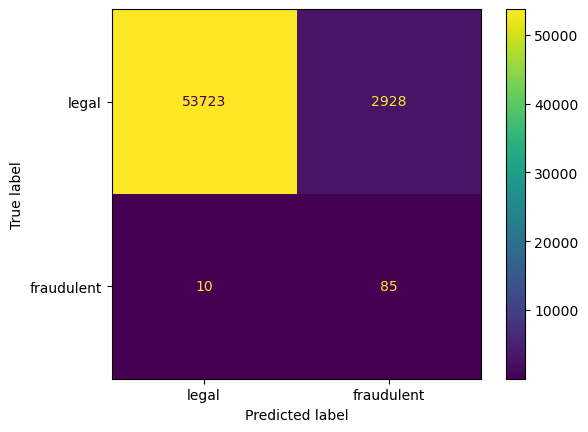

,0,1,macro avg,weighted avg
precision,0.999814,0.028211,0.514012,0.998187
recall,0.948315,0.894737,0.921526,0.948225
f1-score,0.973384,0.054698,0.514041,0.971846
support,56651.000000,95.000000,56746.000000,56746.000000


FOLD 2
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56651
           1       0.04      0.84      0.07        94

    accuracy                           0.96     56745
   macro avg       0.52      0.90      0.53     56745
weighted avg       1.00      0.96      0.98     56745

--------------CONFUSION MATRIX--------------



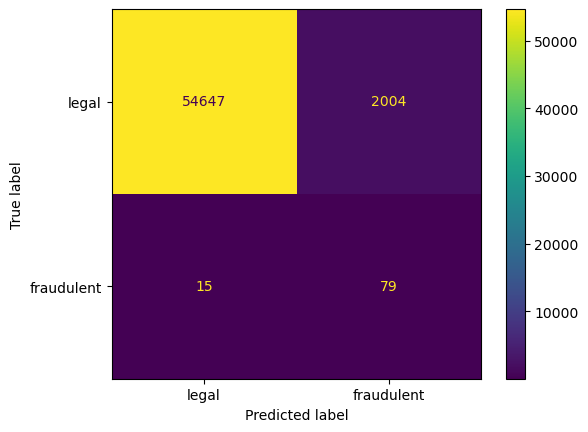

,0,1,macro avg,weighted avg
precision,0.999726,0.037926,0.518826,0.998132
recall,0.964626,0.840426,0.902526,0.964420
f1-score,0.981862,0.072577,0.527219,0.980356
support,56651.000000,94.000000,56745.000000,56745.000000


FOLD 3
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56651
           1       0.04      0.91      0.07        94

    accuracy                           0.96     56745
   macro avg       0.52      0.94      0.52     56745
weighted avg       1.00      0.96      0.98     56745

--------------CONFUSION MATRIX--------------



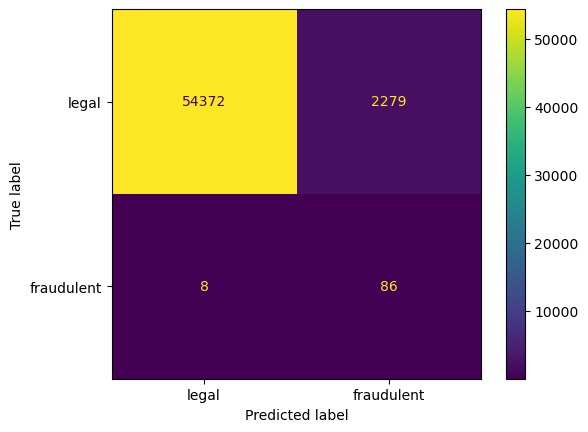

,0,1,macro avg,weighted avg
precision,0.999853,0.036364,0.518108,0.998257
recall,0.959771,0.914894,0.937332,0.959697
f1-score,0.979402,0.069947,0.524675,0.977896
support,56651.000000,94.000000,56745.000000,56745.000000


FOLD 4
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56650
           1       0.05      0.89      0.09        95

    accuracy                           0.97     56745
   macro avg       0.52      0.93      0.54     56745
weighted avg       1.00      0.97      0.98     56745

--------------CONFUSION MATRIX--------------



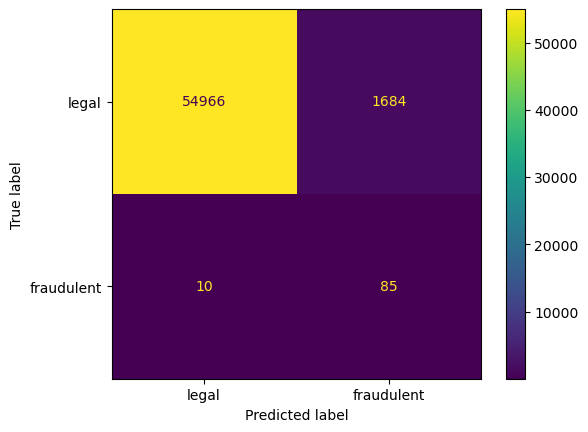

,0,1,macro avg,weighted avg
precision,0.999818,0.048050,0.523934,0.998225
recall,0.970274,0.894737,0.932505,0.970147
f1-score,0.984824,0.091202,0.538013,0.983328
support,56650.000000,95.000000,56745.000000,56745.000000


FOLD 5
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56650
           1       0.03      0.96      0.06        95

    accuracy                           0.95     56745
   macro avg       0.52      0.95      0.52     56745
weighted avg       1.00      0.95      0.97     56745

--------------CONFUSION MATRIX--------------



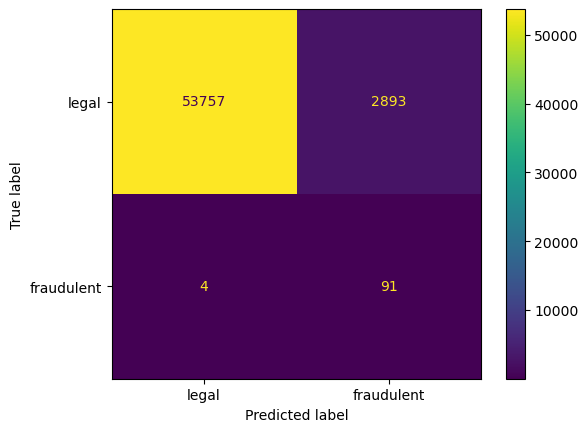

,0,1,macro avg,weighted avg
precision,0.999926,0.030496,0.515211,0.998303
recall,0.948932,0.957895,0.953413,0.948947
f1-score,0.973762,0.059110,0.516436,0.972230
support,56650.000000,95.000000,56745.000000,56745.000000


In [33]:
neural_net = MLPClassifier(solver = 'adam', max_iter = 200, hidden_layer_sizes = (10,10), random_state = 0)

list_df_metrics = []
fit_time = []
acc_nn = []
auc_nn = []

k = 1
for train_index, test_index in skf.split(np.zeros(len(df_target)), df_target):
    print(f'FOLD {k}')
    
    X_tr = df_data.iloc[train_index]
    y_tr = df_target.iloc[train_index]
    X_te = df_data.iloc[test_index]
    y_te = df_target.iloc[test_index]
    
    X_tr_over, y_tr_over = over_sampler.fit_resample(X_tr, y_tr)

    start = time.time()
    neural_net.fit(X_tr_over, y_tr_over)
    end = time.time()
    
    fit_time.append(str(round(end-start, 2)))
    
    y_pred = neural_net.predict(X_te)
    
    auc_nn.append(roc_auc_score(y_pred, y_te))

    print("--------------CLASSIFICATION REPORT--------------\n")
    cr = classification_report(y_te, y_pred, output_dict = True)
    print(classification_report(y_te, y_pred))
    
    print("--------------CONFUSION MATRIX--------------\n")
    ConfusionMatrixDisplay.from_predictions(y_te, y_pred, display_labels = ['legal','fraudulent'])
    plt.show()
    
    # Lưu trữ độ chính xác trên tập test-set
    acc_nn.append(cr['accuracy'])
    
    # Lưu trữ số liệu của mỗi lớp dưới dạng khung dữ liệu
    df_metrics = pd.DataFrame({k:v for k,v in cr.items() if k != 'accuracy'})
    display(df_metrics)
    list_df_metrics.append(df_metrics)
    k += 1
    

# Tính chỉ số trung bình mỗi lớp
df_concat = pd.concat(list_df_metrics)
grouped_by_row_index = df_concat.groupby(df_concat.index)
df_nn_avg = grouped_by_row_index.mean()

# Tính toán độ chính xác trung bình
nn_acc_avg = np.mean(acc_nn)

# Tính toán trung bình AUC và fit time
auc_nn_avg = np.mean(auc_nn)

fit_time = [float(i) for i in fit_time]
fit_time_nn_avg = np.mean(fit_time)

## RANDOM FOREST - OVERSAMPLING

FOLD 1
Class
0    226602
1    226602
Name: count, dtype: int64
Class
0    56651
1       95
Name: count, dtype: int64
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.91      0.79      0.85        95

    accuracy                           1.00     56746
   macro avg       0.96      0.89      0.92     56746
weighted avg       1.00      1.00      1.00     56746

--------------CONFUSION MATRIX--------------



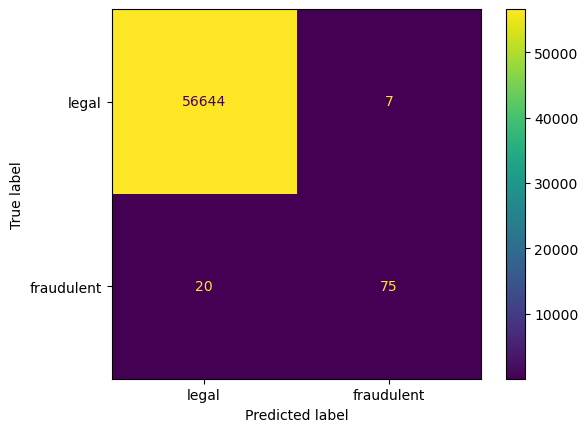

,0,1,macro avg,weighted avg
precision,0.999647,0.914634,0.957141,0.999505
recall,0.999876,0.789474,0.894675,0.999524
f1-score,0.999762,0.847458,0.923610,0.999507
support,56651.000000,95.000000,56746.000000,56746.000000


FOLD 2
Class
0    226602
1    226602
Name: count, dtype: int64
Class
0    56651
1       94
Name: count, dtype: int64
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.92      0.70      0.80        94

    accuracy                           1.00     56745
   macro avg       0.96      0.85      0.90     56745
weighted avg       1.00      1.00      1.00     56745

--------------CONFUSION MATRIX--------------



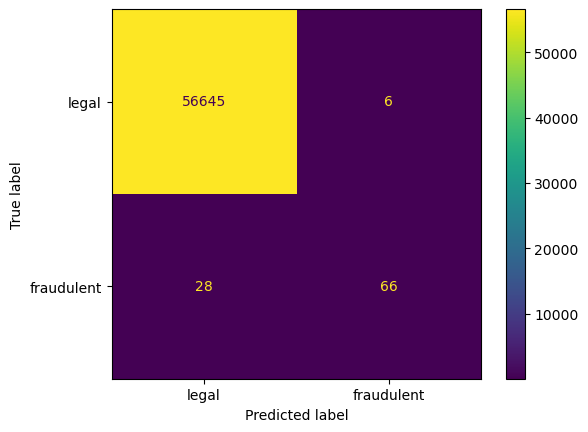

,0,1,macro avg,weighted avg
precision,0.999506,0.916667,0.958086,0.999369
recall,0.999894,0.702128,0.851011,0.999401
f1-score,0.999700,0.795181,0.897440,0.999361
support,56651.000000,94.000000,56745.000000,56745.000000


FOLD 3
Class
0    226602
1    226602
Name: count, dtype: int64
Class
0    56651
1       94
Name: count, dtype: int64
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.94      0.81      0.87        94

    accuracy                           1.00     56745
   macro avg       0.97      0.90      0.93     56745
weighted avg       1.00      1.00      1.00     56745

--------------CONFUSION MATRIX--------------



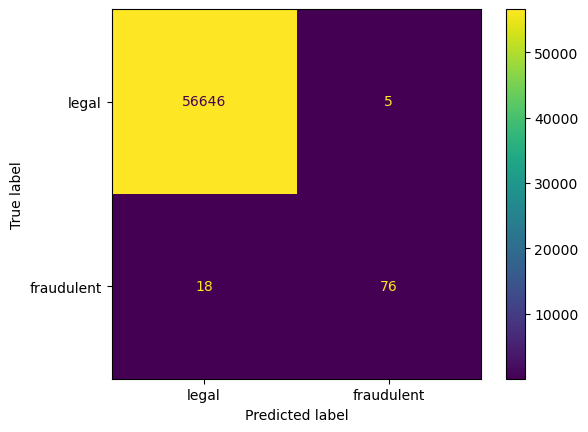

,0,1,macro avg,weighted avg
precision,0.999682,0.938272,0.968977,0.999581
recall,0.999912,0.808511,0.904211,0.999595
f1-score,0.999797,0.868571,0.934184,0.999580
support,56651.000000,94.000000,56745.000000,56745.000000


FOLD 4
Class
0    226603
1    226603
Name: count, dtype: int64
Class
0    56650
1       95
Name: count, dtype: int64
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.93      0.81      0.87        95

    accuracy                           1.00     56745
   macro avg       0.96      0.91      0.93     56745
weighted avg       1.00      1.00      1.00     56745

--------------CONFUSION MATRIX--------------



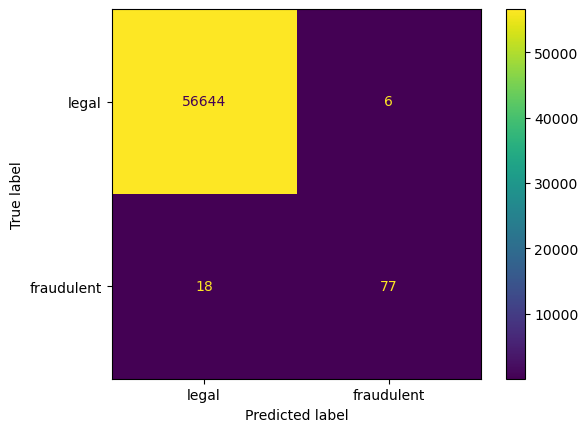

,0,1,macro avg,weighted avg
precision,0.999682,0.927711,0.963697,0.999562
recall,0.999894,0.810526,0.905210,0.999577
f1-score,0.999788,0.865169,0.932478,0.999563
support,56650.000000,95.000000,56745.000000,56745.000000


FOLD 5
Class
0    226603
1    226603
Name: count, dtype: int64
Class
0    56650
1       95
Name: count, dtype: int64
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.94      0.77      0.84        95

    accuracy                           1.00     56745
   macro avg       0.97      0.88      0.92     56745
weighted avg       1.00      1.00      1.00     56745

--------------CONFUSION MATRIX--------------



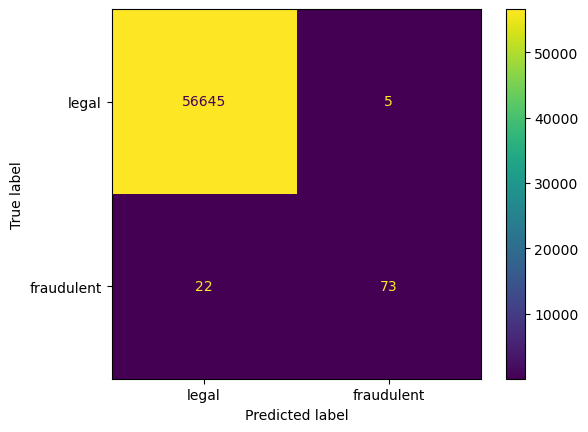

,0,1,macro avg,weighted avg
precision,0.999612,0.935897,0.967755,0.999505
recall,0.999912,0.768421,0.884166,0.999524
f1-score,0.999762,0.843931,0.921846,0.999501
support,56650.000000,95.000000,56745.000000,56745.000000


In [34]:
random_for = RandomForestClassifier(max_depth = 20, random_state = 0)

list_df_metrics = []
fit_time = []
auc_rf = []
acc_rf = []

k = 1
for train_index, test_index in skf.split(np.zeros(len(df_target)), df_target):
    print(f'FOLD {k}')
    
    X_tr = df_data.iloc[train_index]
    y_tr = df_target.iloc[train_index]
    X_te = df_data.iloc[test_index]
    y_te = df_target.iloc[test_index]
    
    X_tr_over, y_tr_over = over_sampler.fit_resample(X_tr, y_tr)
    
    print(y_tr_over.value_counts())
    print(y_te.value_counts())
    
    start = time.time()
    random_for.fit(X_tr_over, y_tr_over)
    end = time.time()
    
    fit_time.append(str(round(end-start, 2)))

    y_pred = random_for.predict(X_te)
    
    auc_rf.append(roc_auc_score(y_pred, y_te))
    
    print("--------------CLASSIFICATION REPORT--------------\n")
    cr = classification_report(y_te, y_pred, output_dict = True)
    print(classification_report(y_te, y_pred))
    
    print("--------------CONFUSION MATRIX--------------\n")
    ConfusionMatrixDisplay.from_predictions(y_te, y_pred, display_labels = ['legal','fraudulent'])
    plt.show()
    
    # Lưu trữ độ chính xác cho tập test-set
    acc_rf.append(cr['accuracy'])
    
    # Lưu trữ số liệu của mỗi lớp dưới dạng khung dữ liệu
    df_metrics = pd.DataFrame({k:v for k,v in cr.items() if k != 'accuracy'})
    display(df_metrics)
    list_df_metrics.append(df_metrics)
    k += 1
    

# Tính chỉ số trung bình mỗi lớp  
df_concat = pd.concat(list_df_metrics)
grouped_by_row_index = df_concat.groupby(df_concat.index)
df_rf_avg = grouped_by_row_index.mean()

# Tính toán độ chính xác trung bình
acc_rf_avg = np.mean(acc_rf)

# Tính toán trung bình AUC và fit time
auc_rf_avg = np.mean(auc_rf)

fit_time = [float(i) for i in fit_time]
fit_time_rf_avg = np.mean(fit_time)

## PERFORMANCE EVALUATION

In [35]:
display_side_by_side(df_lr_avg, df_nn_avg, titles = ['Logistic Regression', 'Neural Net'])
display_side_by_side(df_rf_avg, titles = ['Random Forest'])

print_auc_acc_metrics(auc_lr_avg, auc_nn_avg, auc_rf_avg, acc_lr_avg, nn_acc_avg, acc_rf_avg)

,0,1,macro avg,weighted avg
f1-score,0.988946,0.122339,0.555643,0.987501
precision,0.999841,0.065631,0.532736,0.998284
recall,0.978288,0.906920,0.942604,0.978169
support,56650.600000,94.600000,56745.200000,56745.200000
,0,1,macro avg,weighted avg
f1-score,0.978647,0.069507,0.524077,0.977131
precision,0.999827,0.036209,0.518018,0.998221
recall,0.958384,0.900538,0.929461,0.958287
support,56650.600000,94.600000,56745.200000,56745.200000


,0,1,macro avg,weighted avg
f1-score,0.999762,0.844062,0.921912,0.999502
precision,0.999626,0.926636,0.963131,0.999504
recall,0.999898,0.775812,0.887855,0.999524
support,56650.600000,94.600000,56745.200000,56745.200000




---------------AUC EVALUATION----------------

AUC LOGISTIC-REGRESSION: 0.5327360600267607

AUC NEURAL NETWORK: 0.5180182581118172

AUC RANDOM FOREST: 0.96313101087646



---------------ACCURACY EVALUATION----------------

ACCURACY LOGISTIC-REGRESSION: 0.9781690717351417

ACCURACY NEURAL NETWORK: 0.9582872562325295

ACCURACY RANDOM FOREST: 0.9995241888300448



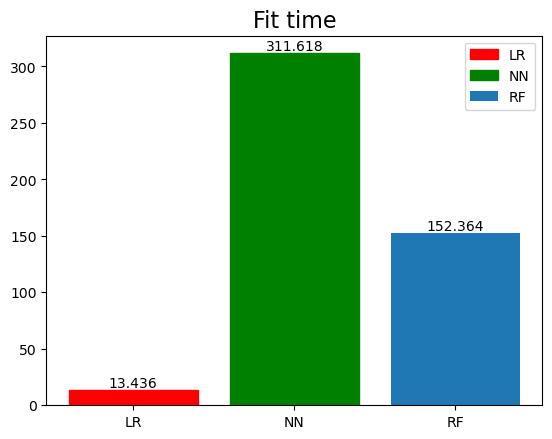

In [36]:
# Vẽ biểu đồ fit-time của ba mô hình được chọn
fig, ax = plt.subplots()
plot = plt.bar([1,2,3], [fit_time_lr_avg, fit_time_nn_avg, fit_time_rf_avg], label = ['LR', 'NN', 'RF'])
ax.bar_label(plot)
plot[0].set_color('r')
plot[1].set_color('g')
plt.legend(loc = 'best')
plt.xticks([1,2,3], ['LR', 'NN', 'RF'])
plt.title('Fit time', fontsize = 16);
plt.show()

## T-TEST TRÊN 2 PHÂN LOẠI TỐT NHẤT (AUC)

In [37]:
# Random Forest và Logistic Regression
t_test(auc_rf, auc_lr, 0.05)

Chúng tôi bác bỏ giả thuyết không ở mức độ tin cậy là 5.0%
Phân phối khác nhau về mặt thống kê về độ chính xác [p: 2.886936460658485e-15]. Bộ phân loại tốt nhất là: First model


## LOGISTIC REGRESSION - UNDERSAMPLING

FOLD 1
Class
0    378
1    378
Name: count, dtype: int64
Class
0    56651
1       95
Name: count, dtype: int64
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.31      0.83      0.45        95

    accuracy                           1.00     56746
   macro avg       0.65      0.91      0.72     56746
weighted avg       1.00      1.00      1.00     56746

--------------CONFUSION MATRIX--------------



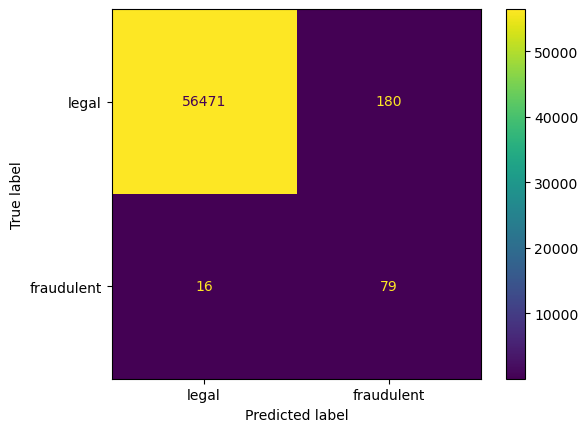

,0,1,macro avg,weighted avg
precision,0.999717,0.305019,0.652368,0.998554
recall,0.996823,0.831579,0.914201,0.996546
f1-score,0.998268,0.446328,0.722298,0.997344
support,56651.000000,95.000000,56746.000000,56746.000000


FOLD 2
Class
0    379
1    379
Name: count, dtype: int64
Class
0    56651
1       94
Name: count, dtype: int64
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.35      0.78      0.48        94

    accuracy                           1.00     56745
   macro avg       0.67      0.89      0.74     56745
weighted avg       1.00      1.00      1.00     56745

--------------CONFUSION MATRIX--------------



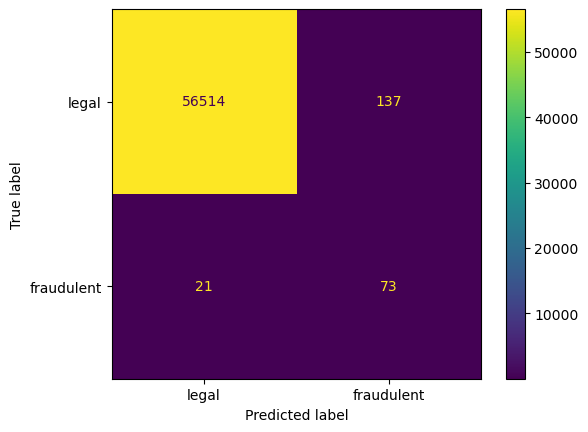

,0,1,macro avg,weighted avg
precision,0.999629,0.347619,0.673624,0.998548
recall,0.997582,0.776596,0.887089,0.997216
f1-score,0.998604,0.480263,0.739434,0.997745
support,56651.000000,94.000000,56745.000000,56745.000000


FOLD 3
Class
0    379
1    379
Name: count, dtype: int64
Class
0    56651
1       94
Name: count, dtype: int64
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.28      0.89      0.43        94

    accuracy                           1.00     56745
   macro avg       0.64      0.94      0.71     56745
weighted avg       1.00      1.00      1.00     56745

--------------CONFUSION MATRIX--------------



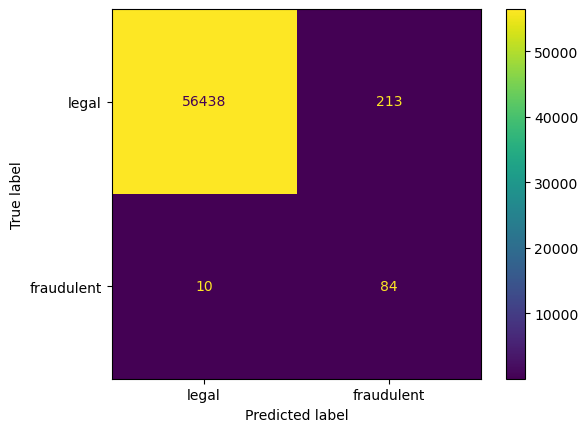

,0,1,macro avg,weighted avg
precision,0.999823,0.282828,0.641326,0.998635
recall,0.996240,0.893617,0.944929,0.996070
f1-score,0.998028,0.429668,0.713848,0.997087
support,56651.000000,94.000000,56745.000000,56745.000000


FOLD 4
Class
0    378
1    378
Name: count, dtype: int64
Class
0    56650
1       95
Name: count, dtype: int64
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.32      0.86      0.47        95

    accuracy                           1.00     56745
   macro avg       0.66      0.93      0.73     56745
weighted avg       1.00      1.00      1.00     56745

--------------CONFUSION MATRIX--------------



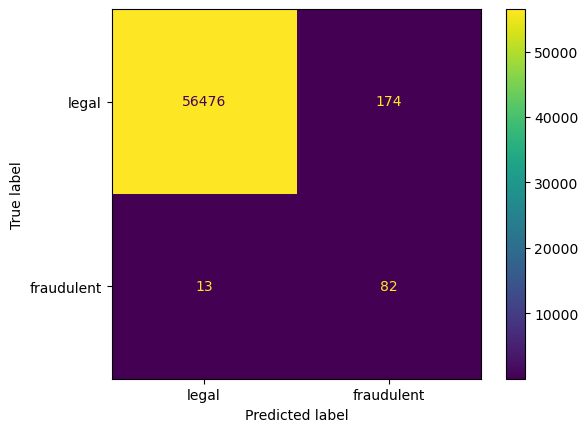

,0,1,macro avg,weighted avg
precision,0.999770,0.320312,0.660041,0.998632
recall,0.996929,0.863158,0.930043,0.996705
f1-score,0.998347,0.467236,0.732792,0.997458
support,56650.000000,95.000000,56745.000000,56745.000000


FOLD 5
Class
0    378
1    378
Name: count, dtype: int64
Class
0    56650
1       95
Name: count, dtype: int64
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.36      0.85      0.51        95

    accuracy                           1.00     56745
   macro avg       0.68      0.93      0.75     56745
weighted avg       1.00      1.00      1.00     56745

--------------CONFUSION MATRIX--------------



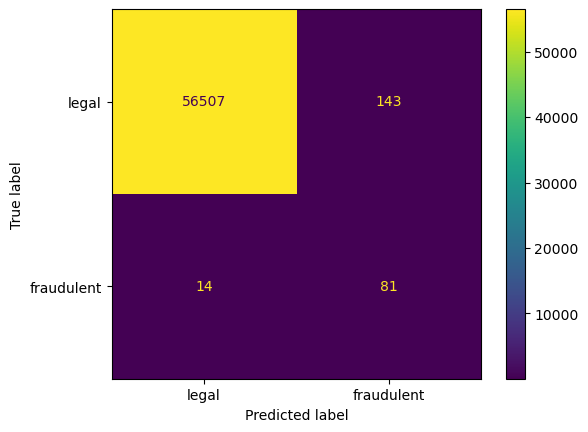

,0,1,macro avg,weighted avg
precision,0.999752,0.361607,0.680680,0.998684
recall,0.997476,0.852632,0.925054,0.997233
f1-score,0.998613,0.507837,0.753225,0.997791
support,56650.000000,95.000000,56745.000000,56745.000000


In [38]:
model = LogisticRegression(max_iter = 1000, random_state = 0)

list_df_metrics = []
fit_time = []
auc_lr = []
acc_lr = []

k = 1
for train_index, test_index in skf.split(np.zeros(len(df_target)), df_target):
    print(f'FOLD {k}')
    
    X_tr = df_data.iloc[train_index]
    y_tr = df_target.iloc[train_index]
    X_te = df_data.iloc[test_index]
    y_te = df_target.iloc[test_index]
    
    X_tr_under, y_tr_under = under_sampler.fit_resample(X_tr, y_tr)
    
    print(y_tr_under.value_counts())
    print(y_te.value_counts())
    
    start = time.time()
    model.fit(X_tr_under,y_tr_under)
    end = time.time()
    
    fit_time.append(str(round(end-start, 2)))
    
    y_pred = model.predict(X_te)
    
    auc_lr.append(roc_auc_score(y_pred, y_te))
    
    print("--------------CLASSIFICATION REPORT--------------\n")
    cr = classification_report(y_te, y_pred, output_dict = True)
    print(classification_report(y_te, y_pred))
    
    print("--------------CONFUSION MATRIX--------------\n")
    ConfusionMatrixDisplay.from_predictions(y_te, y_pred, display_labels = ['legal','fraudulent'])
    plt.show()
    
    # Lưu trữ độ chính xác
    acc_lr.append(cr['accuracy'])
    
    # Lưu trữ số liệu của mỗi lớp dưới dạng khung dữ liệu
    df_metrics = pd.DataFrame({k:v for k,v in cr.items() if k != 'accuracy'})
    display(df_metrics)
    list_df_metrics.append(df_metrics)
    k += 1
    

# Tính chỉ số trung bình mỗi lớp
df_concat = pd.concat(list_df_metrics)
grouped_by_row_index = df_concat.groupby(df_concat.index)
df_lr_avg = grouped_by_row_index.mean()

# Tính toán độ chính xác trung bình
acc_lr_avg = np.mean(acc_lr)

# Tính toán trung bình AUC và fit time
auc_lr_avg = np.mean(auc_lr) 
fit_time = [float(i) for i in fit_time]
fit_time_lr_avg = np.mean(fit_time)

## NEURAL NETWORK - UNDERSAMPLING

FOLD 1
Class
0    378
1    378
Name: count, dtype: int64
Class
0    56651
1       95
Name: count, dtype: int64


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.37      0.83      0.51        95

    accuracy                           1.00     56746
   macro avg       0.68      0.91      0.75     56746
weighted avg       1.00      1.00      1.00     56746

--------------CONFUSION MATRIX--------------



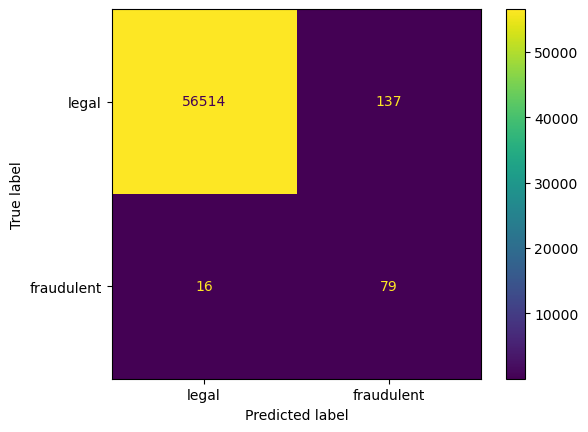

,0,1,macro avg,weighted avg
precision,0.999717,0.365741,0.682729,0.998656
recall,0.997582,0.831579,0.914580,0.997304
f1-score,0.998648,0.508039,0.753343,0.997827
support,56651.000000,95.000000,56746.000000,56746.000000


FOLD 2
Class
0    379
1    379
Name: count, dtype: int64
Class
0    56651
1       94
Name: count, dtype: int64
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.38      0.78      0.51        94

    accuracy                           1.00     56745
   macro avg       0.69      0.89      0.75     56745
weighted avg       1.00      1.00      1.00     56745

--------------CONFUSION MATRIX--------------



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


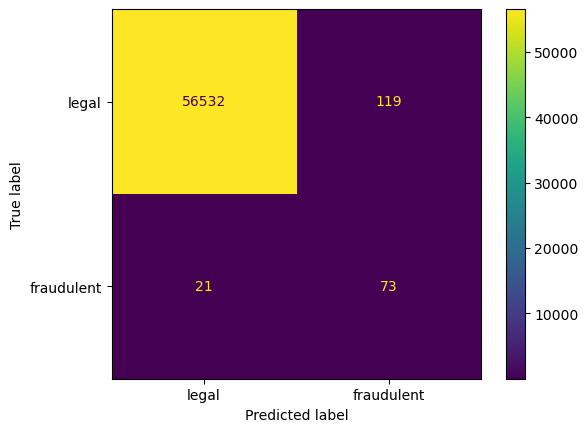

,0,1,macro avg,weighted avg
precision,0.999629,0.380208,0.689919,0.998603
recall,0.997899,0.776596,0.887248,0.997533
f1-score,0.998763,0.510490,0.754626,0.997954
support,56651.000000,94.000000,56745.000000,56745.000000


FOLD 3
Class
0    379
1    379
Name: count, dtype: int64
Class
0    56651
1       94
Name: count, dtype: int64
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.34      0.89      0.49        94

    accuracy                           1.00     56745
   macro avg       0.67      0.95      0.74     56745
weighted avg       1.00      1.00      1.00     56745

--------------CONFUSION MATRIX--------------



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


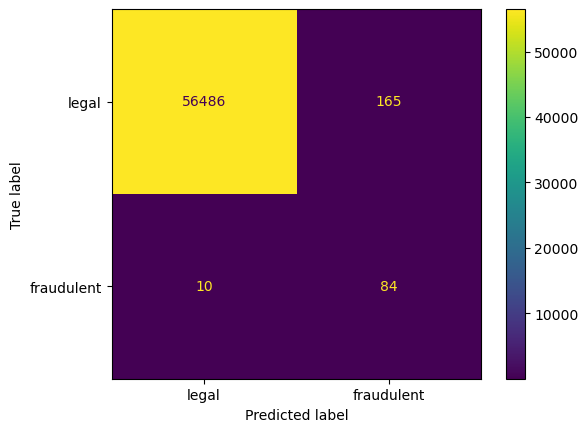

,0,1,macro avg,weighted avg
precision,0.999823,0.337349,0.668586,0.998726
recall,0.997087,0.893617,0.945352,0.996916
f1-score,0.998453,0.489796,0.744125,0.997611
support,56651.000000,94.000000,56745.000000,56745.000000


FOLD 4
Class
0    378
1    378
Name: count, dtype: int64
Class
0    56650
1       95
Name: count, dtype: int64


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.36      0.84      0.51        95

    accuracy                           1.00     56745
   macro avg       0.68      0.92      0.75     56745
weighted avg       1.00      1.00      1.00     56745

--------------CONFUSION MATRIX--------------



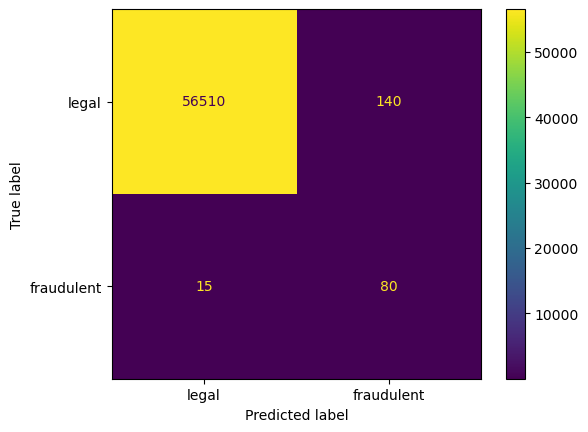

,0,1,macro avg,weighted avg
precision,0.999735,0.363636,0.681685,0.998670
recall,0.997529,0.842105,0.919817,0.997268
f1-score,0.998630,0.507937,0.753283,0.997809
support,56650.000000,95.000000,56745.000000,56745.000000


FOLD 5
Class
0    378
1    378
Name: count, dtype: int64
Class
0    56650
1       95
Name: count, dtype: int64
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.40      0.82      0.54        95

    accuracy                           1.00     56745
   macro avg       0.70      0.91      0.77     56745
weighted avg       1.00      1.00      1.00     56745

--------------CONFUSION MATRIX--------------



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


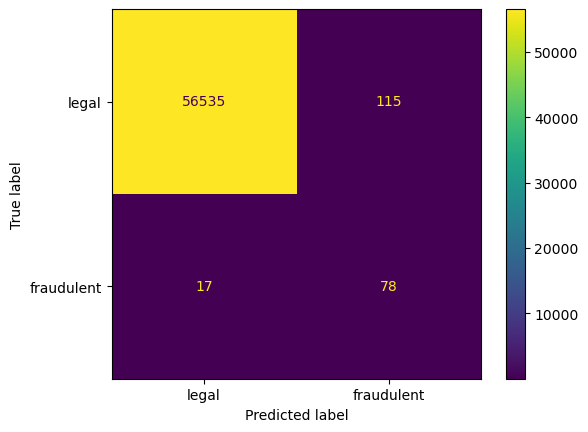

,0,1,macro avg,weighted avg
precision,0.999699,0.404145,0.701922,0.998702
recall,0.997970,0.821053,0.909511,0.997674
f1-score,0.998834,0.541667,0.770250,0.998069
support,56650.000000,95.000000,56745.000000,56745.000000


In [39]:
neural_net = MLPClassifier(solver = 'adam', max_iter = 200, hidden_layer_sizes = (10,10), random_state = 0)

list_df_metrics = []
fit_time = []
auc_nn = []
acc_nn = []

k = 1
for train_index, test_index in skf.split(np.zeros(len(df_target)), df_target):
    print(f'FOLD {k}')
    
    X_tr = df_data.iloc[train_index]
    y_tr = df_target.iloc[train_index]
    X_te = df_data.iloc[test_index]
    y_te = df_target.iloc[test_index]
    
    X_tr_under, y_tr_under = under_sampler.fit_resample(X_tr, y_tr)
    
    print(y_tr_under.value_counts())
    print(y_te.value_counts())

    start = time.time()
    neural_net.fit(X_tr_under, y_tr_under)
    end = time.time()
    
    fit_time.append(str(round(end-start, 2)))

    y_pred = neural_net.predict(X_te)

    auc_nn.append(roc_auc_score(y_pred, y_te))
    
    print("--------------CLASSIFICATION REPORT--------------\n")
    cr = classification_report(y_te, y_pred, output_dict = True)
    print(classification_report(y_te, y_pred))
    
    print("--------------CONFUSION MATRIX--------------\n")
    ConfusionMatrixDisplay.from_predictions(y_te, y_pred, display_labels = ['legal','fraudulent'])
    plt.show()
    
    # Lưu trữ độ chính xác cho test-set
    acc_nn.append(cr['accuracy'])
    
    # Lưu trữ số liệu của mỗi lớp dưới dạng khung dữ liệu
    df_metrics = pd.DataFrame({k:v for k,v in cr.items() if k != 'accuracy'})
    display(df_metrics)
    list_df_metrics.append(df_metrics)
    k += 1
    

# Tính chỉ số trung bình mỗi lớp
df_concat = pd.concat(list_df_metrics)
grouped_by_row_index = df_concat.groupby(df_concat.index)
df_nn_avg = grouped_by_row_index.mean()

# Tính toán độ chính xác trung bình
acc_nn_avg = np.mean(acc_nn)

# Tính toán trung bình AUC và fit time
auc_nn_avg = np.mean(auc_nn) 

fit_time = [float(i) for i in fit_time]
fit_time_nn_avg = np.mean(fit_time)

## RANDOM FOREST - UNDERSAMPLING

FOLD 1
Class
0    378
1    378
Name: count, dtype: int64
Class
0    56651
1       95
Name: count, dtype: int64
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.06      0.88      0.12        95

    accuracy                           0.98     56746
   macro avg       0.53      0.93      0.55     56746
weighted avg       1.00      0.98      0.99     56746

--------------CONFUSION MATRIX--------------



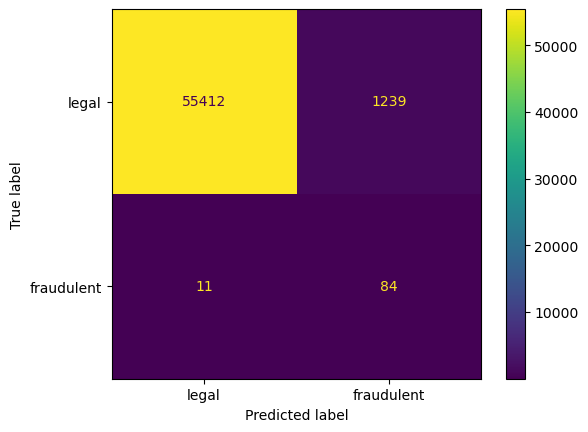

,0,1,macro avg,weighted avg
precision,0.999802,0.063492,0.531647,0.998234
recall,0.978129,0.884211,0.931170,0.977972
f1-score,0.988847,0.118477,0.553662,0.987390
support,56651.000000,95.000000,56746.000000,56746.000000


FOLD 2
Class
0    379
1    379
Name: count, dtype: int64
Class
0    56651
1       94
Name: count, dtype: int64
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.07      0.83      0.13        94

    accuracy                           0.98     56745
   macro avg       0.54      0.91      0.56     56745
weighted avg       1.00      0.98      0.99     56745

--------------CONFUSION MATRIX--------------



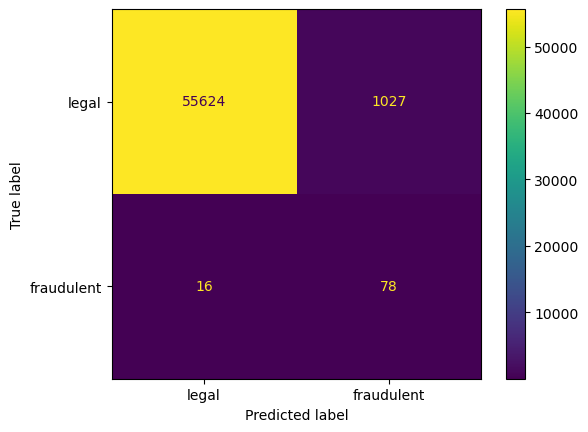

,0,1,macro avg,weighted avg
precision,0.999712,0.070588,0.535150,0.998173
recall,0.981871,0.829787,0.905829,0.981620
f1-score,0.990712,0.130108,0.560410,0.989286
support,56651.000000,94.000000,56745.000000,56745.000000


FOLD 3
Class
0    379
1    379
Name: count, dtype: int64
Class
0    56651
1       94
Name: count, dtype: int64
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.06      0.94      0.12        94

    accuracy                           0.98     56745
   macro avg       0.53      0.96      0.55     56745
weighted avg       1.00      0.98      0.99     56745

--------------CONFUSION MATRIX--------------



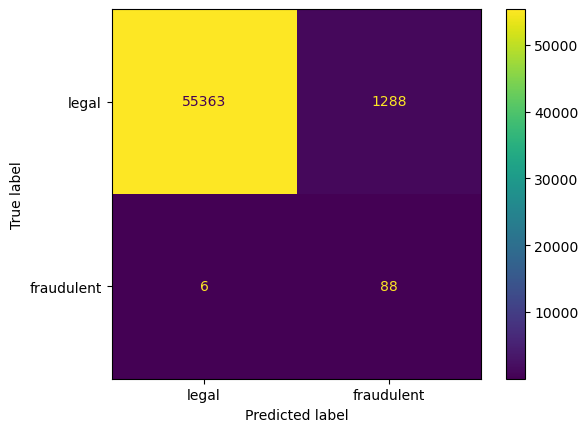

,0,1,macro avg,weighted avg
precision,0.999892,0.063953,0.531923,0.998341
recall,0.977264,0.936170,0.956717,0.977196
f1-score,0.988448,0.119728,0.554088,0.987009
support,56651.000000,94.000000,56745.000000,56745.000000


FOLD 4
Class
0    378
1    378
Name: count, dtype: int64
Class
0    56650
1       95
Name: count, dtype: int64
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56650
           1       0.05      0.92      0.10        95

    accuracy                           0.97     56745
   macro avg       0.53      0.94      0.54     56745
weighted avg       1.00      0.97      0.98     56745

--------------CONFUSION MATRIX--------------



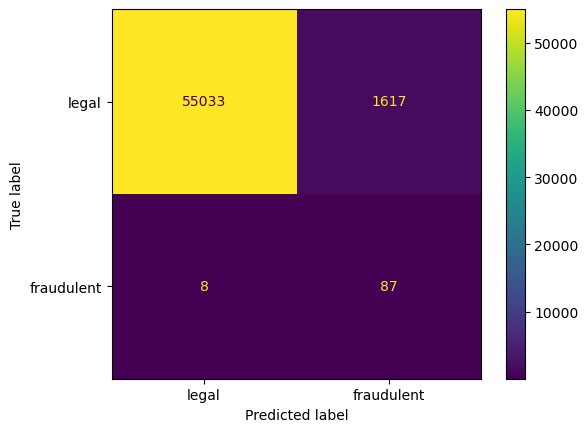

,0,1,macro avg,weighted avg
precision,0.999855,0.051056,0.525455,0.998266
recall,0.971456,0.915789,0.943623,0.971363
f1-score,0.985451,0.096720,0.541086,0.983963
support,56650.000000,95.000000,56745.000000,56745.000000


FOLD 5
Class
0    378
1    378
Name: count, dtype: int64
Class
0    56650
1       95
Name: count, dtype: int64
--------------CLASSIFICATION REPORT--------------

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56650
           1       0.05      0.92      0.10        95

    accuracy                           0.97     56745
   macro avg       0.53      0.94      0.54     56745
weighted avg       1.00      0.97      0.98     56745

--------------CONFUSION MATRIX--------------



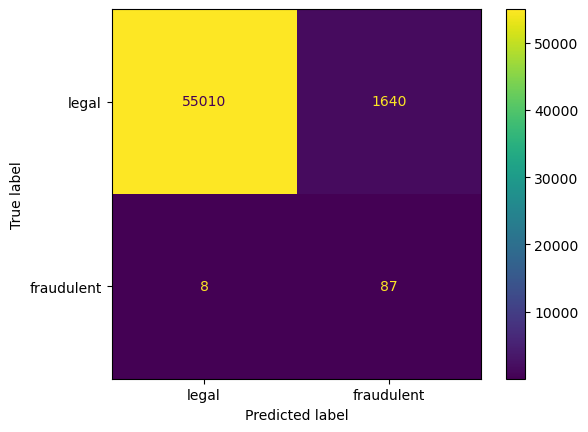

,0,1,macro avg,weighted avg
precision,0.999855,0.050376,0.525115,0.998265
recall,0.971050,0.915789,0.943420,0.970958
f1-score,0.985242,0.095499,0.540371,0.983752
support,56650.000000,95.000000,56745.000000,56745.000000


In [40]:
random_for = RandomForestClassifier(max_depth = 20, random_state = 0)

list_df_metrics = []
fit_time = []
auc_rf = []
acc_rf = []

k = 1
for train_index, test_index in skf.split(np.zeros(len(df_target)), df_target):
    print(f'FOLD {k}')
    
    X_tr = df_data.iloc[train_index]
    y_tr = df_target.iloc[train_index]
    X_te = df_data.iloc[test_index]
    y_te = df_target.iloc[test_index]
    
    X_tr_under, y_tr_under = under_sampler.fit_resample(X_tr, y_tr)
    
    print(y_tr_under.value_counts())
    print(y_te.value_counts())
    
    start = time.time()
    random_for.fit(X_tr_under, y_tr_under)
    end = time.time()
    
    fit_time.append(str(round(end-start, 2)))

    y_pred = random_for.predict(X_te)
    
    auc_rf.append(roc_auc_score(y_pred, y_te))
    
    print("--------------CLASSIFICATION REPORT--------------\n")
    cr = classification_report(y_te, y_pred, output_dict = True)
    print(classification_report(y_te, y_pred))
    
    print("--------------CONFUSION MATRIX--------------\n")
    ConfusionMatrixDisplay.from_predictions(y_te, y_pred, display_labels = ['legal','fraudulent'])
    plt.show()
    
    # Lưu trữ độ chính xác cho tập t-test
    acc_rf.append(cr['accuracy'])
    
    # Lưu trữ số liệu của mỗi lớp dưới dạng khung dữ liệu
    df_metrics = pd.DataFrame({k:v for k,v in cr.items() if k != 'accuracy'})
    display(df_metrics)
    list_df_metrics.append(df_metrics)
    k += 1
    

# Tính chỉ số trung bình mỗi lớp
df_concat = pd.concat(list_df_metrics)
grouped_by_row_index = df_concat.groupby(df_concat.index)
df_rf_avg = grouped_by_row_index.mean()

# Tính toán độ chính xác trung bình
acc_rf_avg = np.mean(acc_rf)

# Tính toán AUC trung bình và fit-time
auc_rf_avg = np.mean(auc_rf) 
fit_time = [float(i) for i in fit_time]
fit_time_rf_avg = np.mean(fit_time)

## PERFORMANCE EVALUATION

In [41]:
display_side_by_side(df_lr_avg, df_nn_avg, titles = ['Logistic Regression', 'Neural Net'])
display_side_by_side(df_rf_avg, titles = ['Random Forest'])

print_auc_acc_metrics(auc_lr_avg, auc_nn_avg, auc_rf_avg, acc_lr_avg, acc_nn_avg, acc_rf_avg)

,0,1,macro avg,weighted avg
f1-score,0.998372,0.466266,0.732319,0.997485
precision,0.999738,0.323477,0.661608,0.998611
recall,0.997010,0.843516,0.920263,0.996754
support,56650.600000,94.600000,56745.200000,56745.200000
,0,1,macro avg,weighted avg
f1-score,0.998666,0.511585,0.755126,0.997854
precision,0.999721,0.370216,0.684968,0.998671
recall,0.997613,0.832990,0.915302,0.997339
support,56650.600000,94.600000,56745.200000,56745.200000


,0,1,macro avg,weighted avg
f1-score,0.987740,0.112107,0.549923,0.986280
precision,0.999823,0.059893,0.529858,0.998256
recall,0.975954,0.896349,0.936152,0.975822
support,56650.600000,94.600000,56745.200000,56745.200000




---------------AUC EVALUATION----------------

AUC LOGISTIC-REGRESSION: 0.6616076592954837

AUC NEURAL NETWORK: 0.6849682563101878

AUC RANDOM FOREST: 0.5298581346901164



---------------ACCURACY EVALUATION----------------

ACCURACY LOGISTIC-REGRESSION: 0.9967539111956576

ACCURACY NEURAL NETWORK: 0.9973389820996573

ACCURACY RANDOM FOREST: 0.9758217359343885



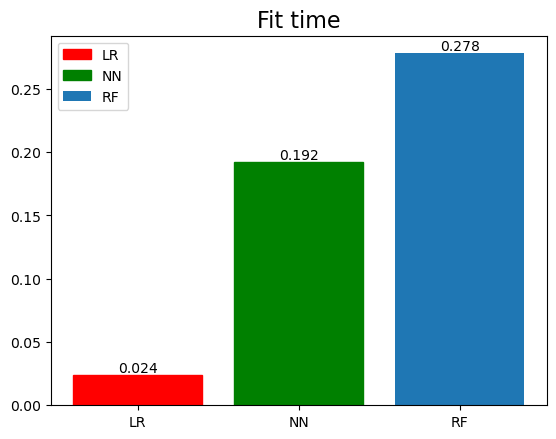

In [42]:
# Vẽ biểu đồ fit-time của ba mô hình được chọn
fig, ax = plt.subplots()
plot = plt.bar([1,2,3], [fit_time_lr_avg, fit_time_nn_avg, fit_time_rf_avg], label = ['LR', 'NN', 'RF'])
ax.bar_label(plot)
plot[0].set_color('r')
plot[1].set_color('g')
plt.legend(loc = 'best')
plt.xticks([1,2,3], ['LR', 'NN', 'RF'])
plt.title('Fit time', fontsize = 16);
plt.show()

## T-TEST ON 2 BEST CLASSIFIERS (AUC)

In [43]:
#Logistic Regression và Neural Network
t_test(auc_lr, auc_nn, 0.05)

Chúng tôi bác bỏ giả thuyết không ở mức độ tin cậy là 5.0%
Phân phối khác nhau về mặt thống kê về độ chính xác [p: 0.031178548069329397]. Bộ phân loại tốt nhất là: Second_model
